In [1]:
import matplotlib.pyplot as plt
import scipy.io as sio
import skimage.io
import numpy as np
import h5py
import sys
import gc

from Data_Extractor import *

/home/admin-u6142160/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
path_train_set = "../Data/090085/Road_Data/motor_trunk_pri_sec_tert_uncl_track/posneg_topleft_coord_split_8_train"

# Load training set
train_set = h5py.File(path_train_set, 'r')
train_pos_topleft_coord = np.array(train_set['positive_example'])
train_neg_topleft_coord = np.array(train_set['negative_example'])
train_raw_image = np.array(train_set['raw_image'])
train_road_mask = np.array(train_set['road_mask'])
train_set.close()
gc.collect()


43

In [3]:
path_cv_set = "../Data/090085/Road_Data/motor_trunk_pri_sec_tert_uncl_track/posneg_topleft_coord_split_8_cv"

# Load cross-validation set
CV_set = h5py.File(path_cv_set, 'r')
CV_pos_topleft_coord = np.array(CV_set['positive_example'])
CV_neg_topleft_coord = np.array(CV_set['negative_example'])
CV_raw_image = np.array(CV_set['raw_image'])
CV_road_mask = np.array(CV_set['road_mask'])
CV_set.close()

gc.collect()

0

In [4]:
path_test_set = "../Data/090085/Road_Data/motor_trunk_pri_sec_tert_uncl_track/posneg_topleft_coord_split_8_test"

# Load training set
test_set = h5py.File(path_test_set, 'r')
test_pos_topleft_coord = np.array(test_set['positive_example'])
test_neg_topleft_coord = np.array(test_set['negative_example'])
test_raw_image = np.array(test_set['raw_image'])
test_road_mask = np.array(test_set['road_mask'])
test_set.close()
gc.collect()

0

Train , val, test raw image distribution

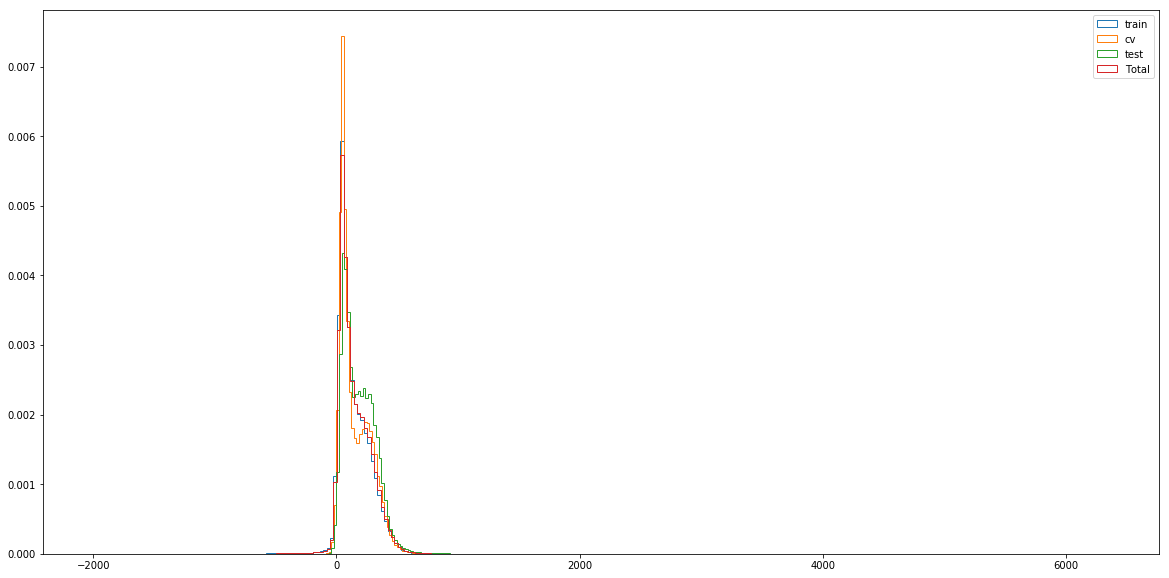

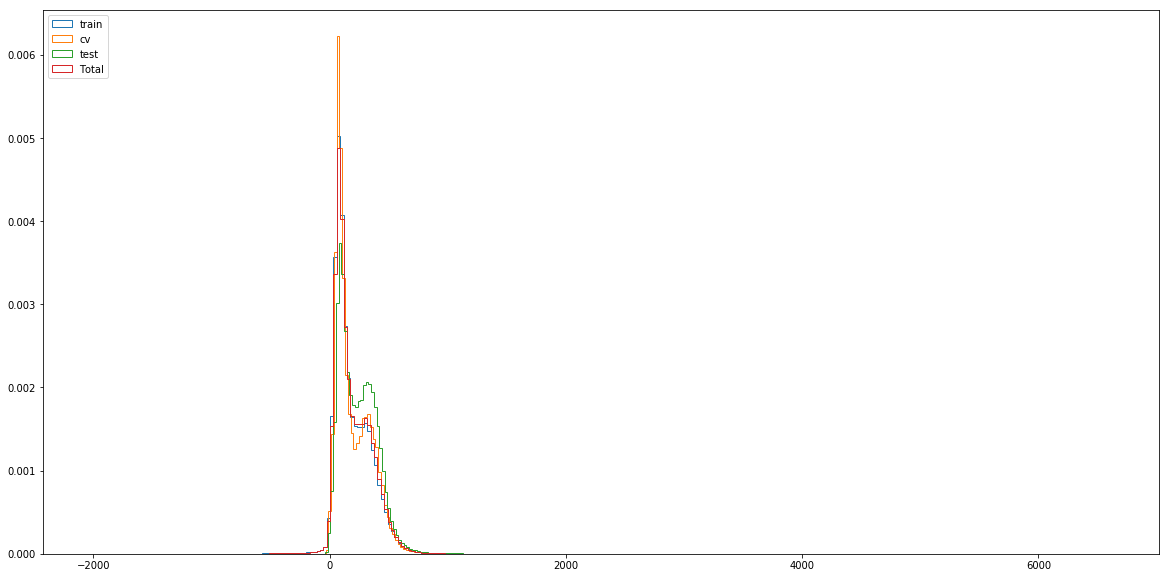

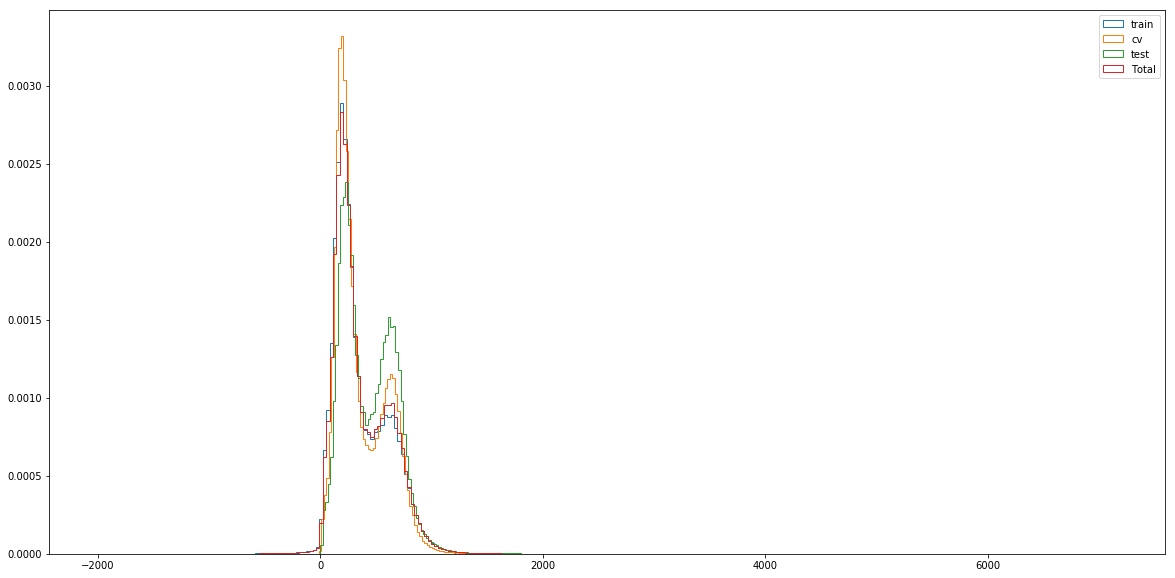

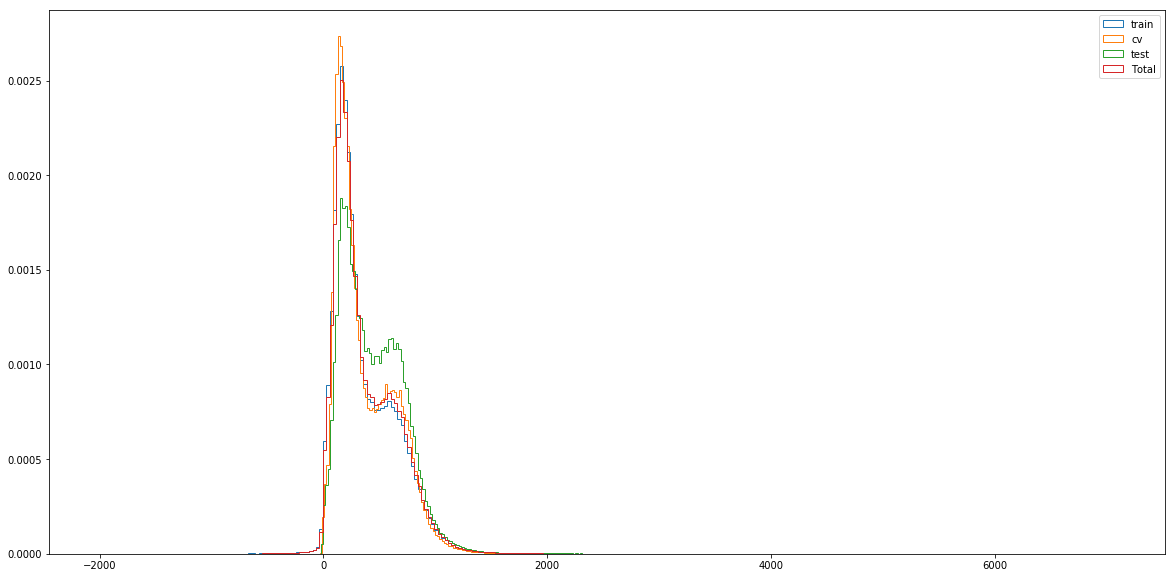

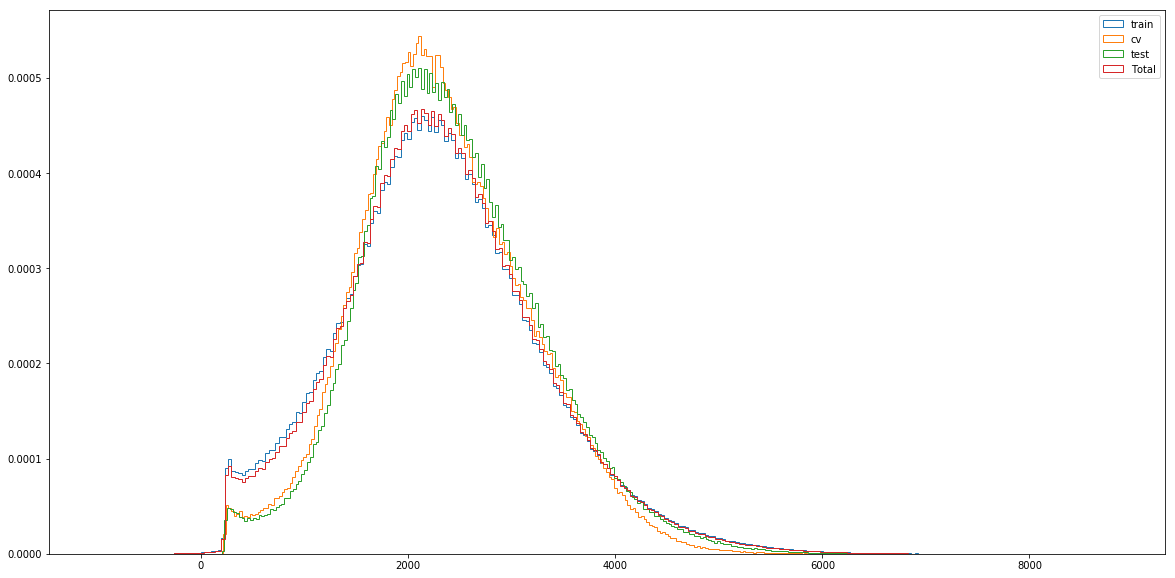

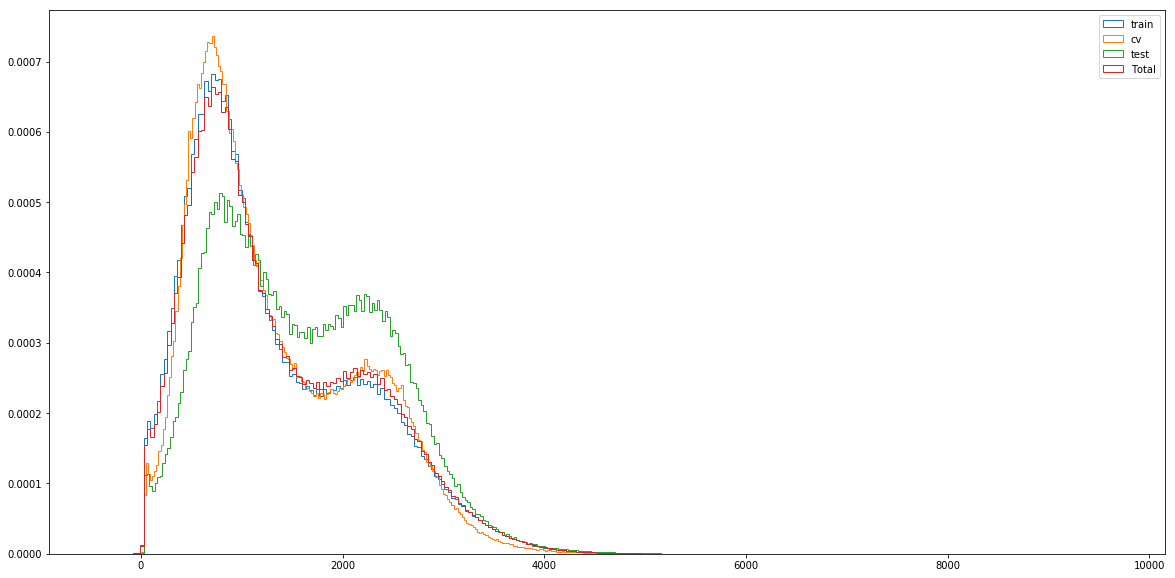

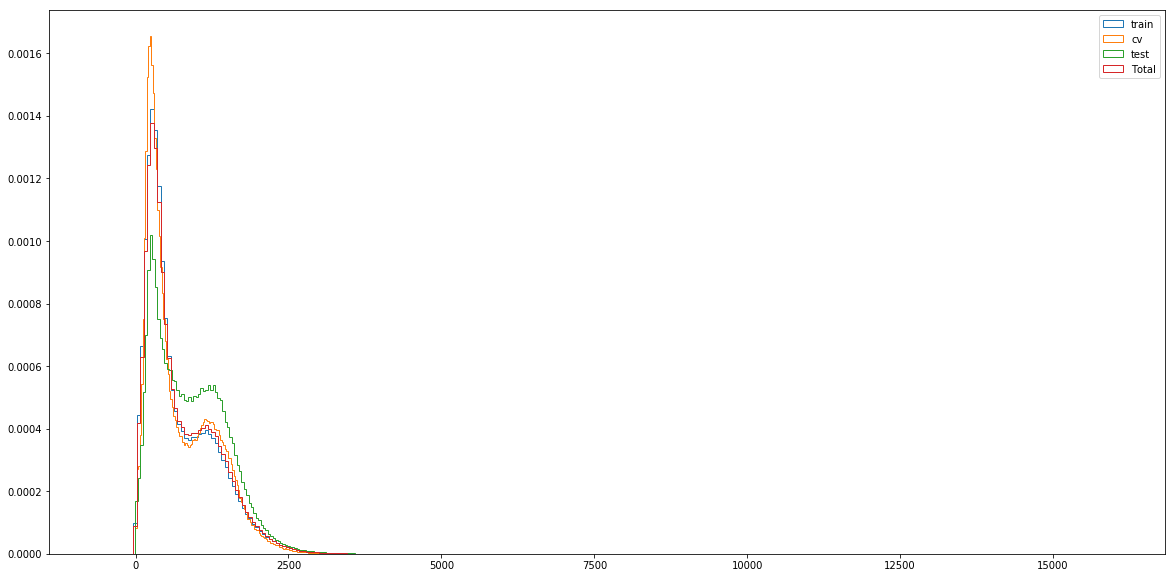

In [13]:
train_valid_idx = np.where(train_raw_image[0] != -9999)
cv_valid_idx = np.where(CV_raw_image[0] != -9999)
test_valid_idx = np.where(test_raw_image[0] != -9999)

for ch_n in range(7):
    plt.figure(figsize=(20, 10))
    
    train_val = train_raw_image[ch_n][train_valid_idx].flatten()
    cv_val = CV_raw_image[ch_n][cv_valid_idx].flatten()
    test_val = test_raw_image[ch_n][test_valid_idx].flatten()
    total_val = np.concatenate((train_val, cv_val, test_val))
    
    plt.hist(train_val, bins=300, histtype='step', density=True, label='train')
    plt.hist(cv_val, bins=300, histtype='step', density=True, label='cv')
    plt.hist(test_val, bins=300, histtype='step', density=True, label='test')
    plt.hist(total_val, bins=300, histtype='step', density=True, label='Total')
    plt.legend()
    plt.savefig('./Result/Channel Analysis/train-cv-test_channel_' + str(ch_n) + '.png')
    plt.show()
plt.close() 

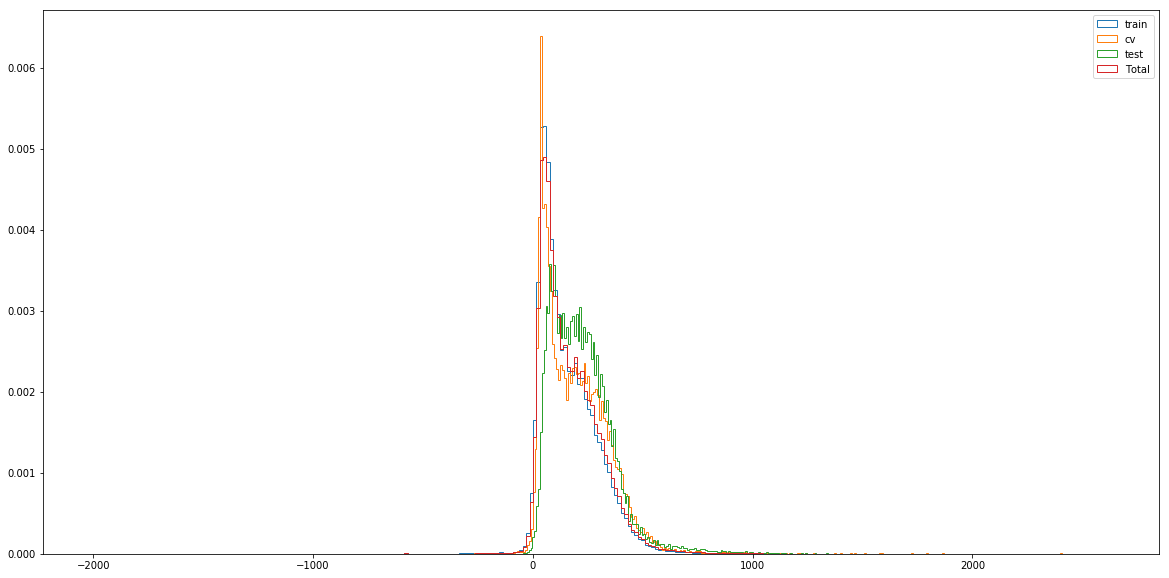

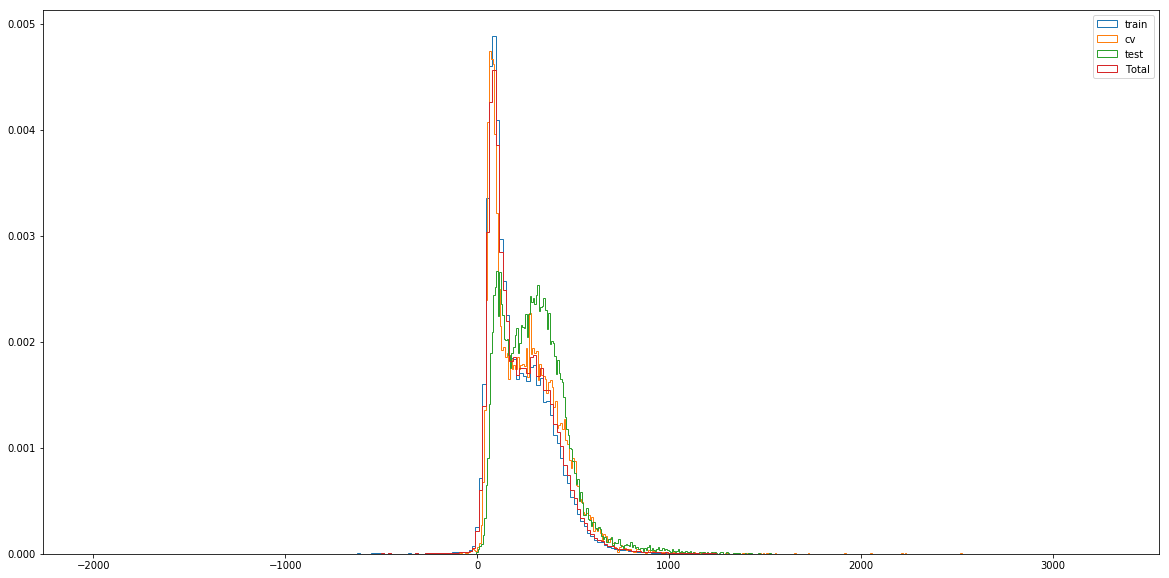

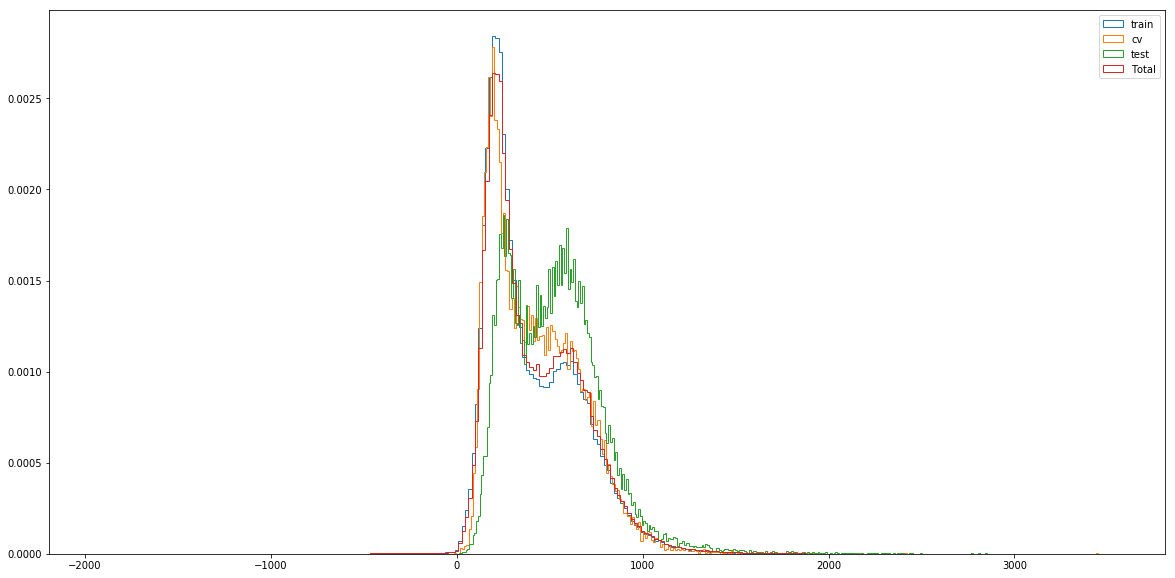

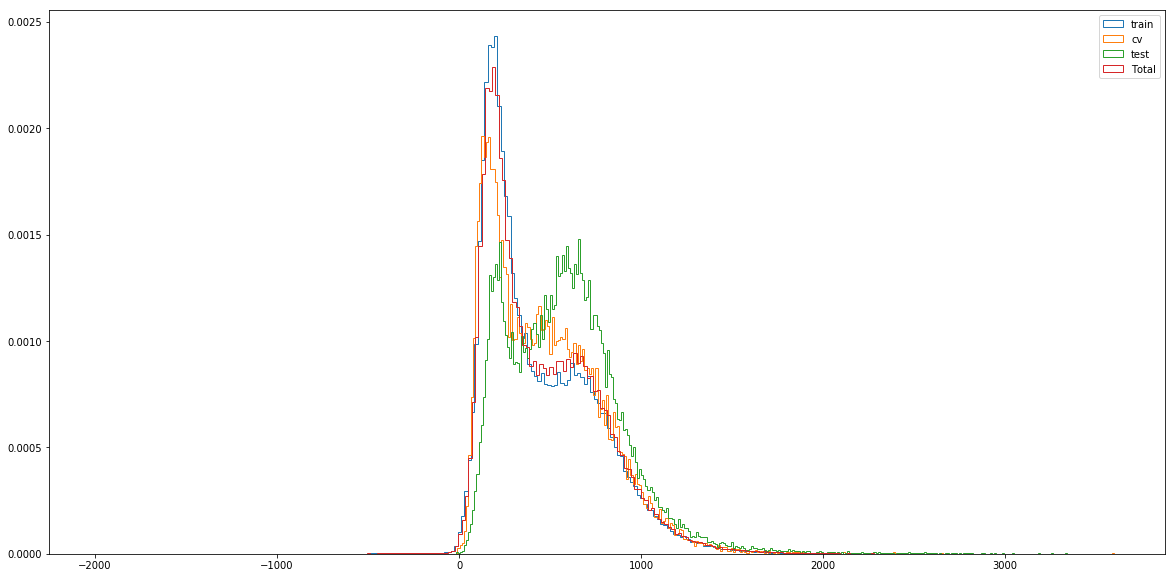

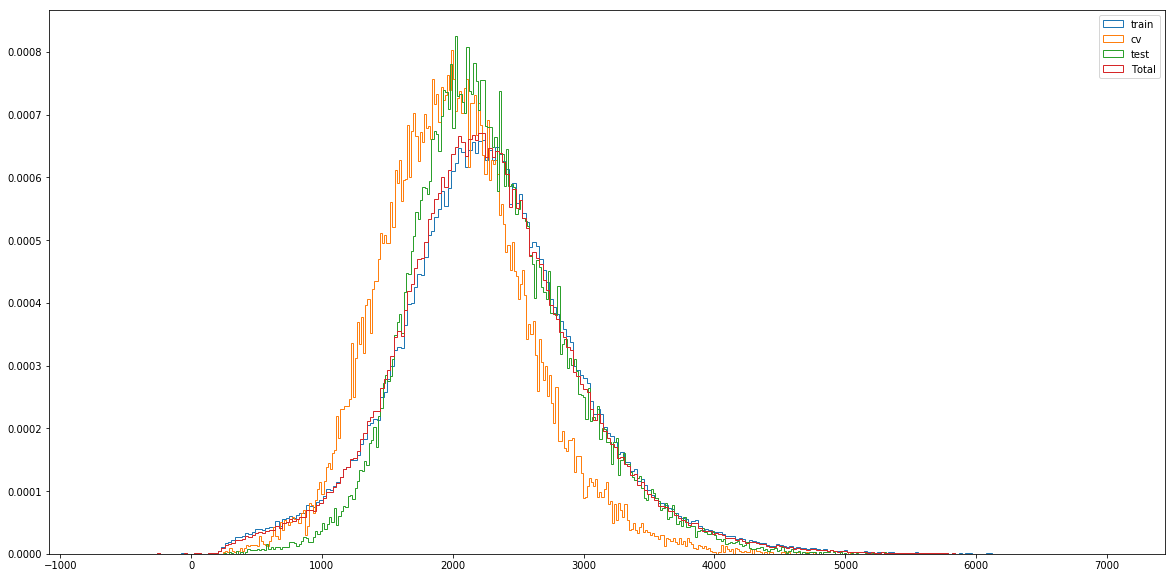

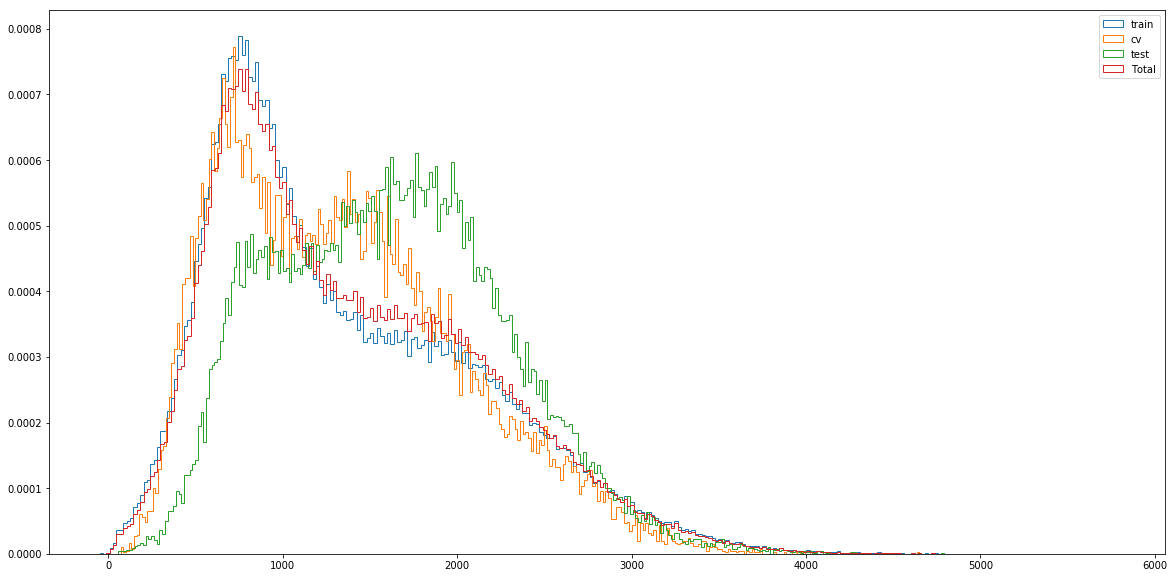

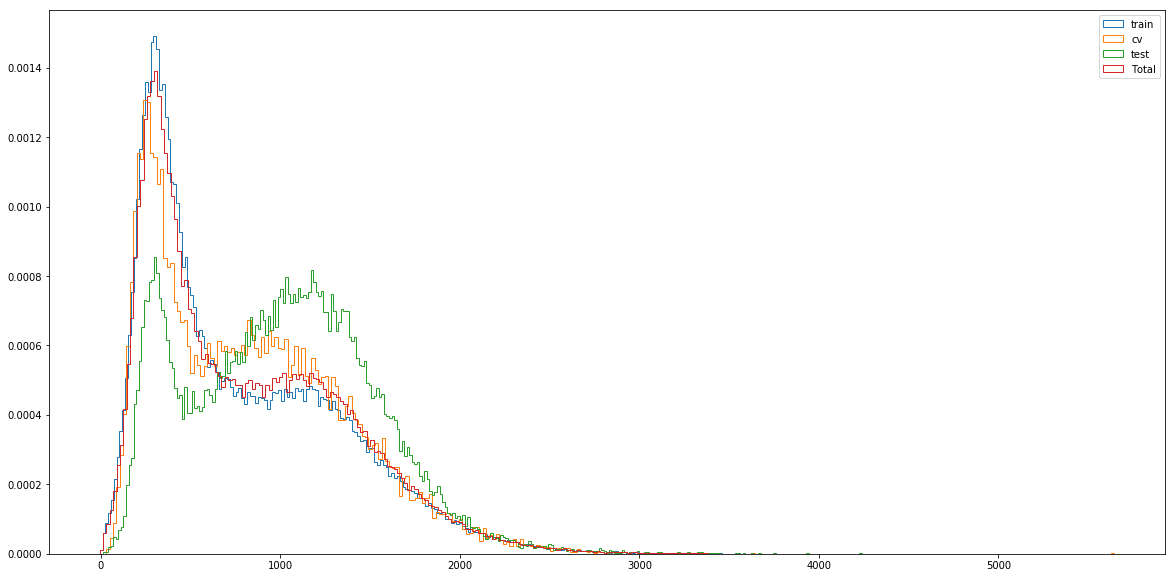

In [11]:
train_road_idx = np.where(np.logical_and(train_road_mask == 1, train_raw_image[0] != -9999))
cv_road_idx = np.where(np.logical_and(CV_road_mask == 1, CV_raw_image[0] != -9999))
test_road_idx = np.where(np.logical_and(test_road_mask == 1, test_raw_image[0] != -9999))

for ch_n in range(7):
    plt.figure(figsize=(20, 10))
    
    train_val = train_raw_image[ch_n][train_road_idx].flatten()
    cv_val = CV_raw_image[ch_n][cv_road_idx].flatten()
    test_val = test_raw_image[ch_n][test_road_idx].flatten()
    total_val = np.concatenate((train_val, cv_val, test_val))
    
    plt.hist(train_val, bins=300, histtype='step', density=True, label='train')
    plt.hist(cv_val, bins=300, histtype='step', density=True, label='cv')
    plt.hist(test_val, bins=300, histtype='step', density=True, label='test')
    plt.hist(total_val, bins=300, histtype='step', density=True, label='Total')
    plt.legend()
    plt.savefig('./Result/Channel Analysis/train-cv-test_road_channel_' + str(ch_n) + '.png')
    plt.show()
plt.close() 

In [19]:
# train_road_idx = np.where(np.logical_and(train_road_mask == 1, train_raw_image[0] != -9999))
# train_valid_idx = np.where(train_raw_image[0] != -9999)
train_edge_idx = np.where()

(array([   0,    0,    0, ..., 7649, 7649, 7649]),
 array([   0,    1,    2, ..., 8088, 8089, 8090]))

In [22]:
train_raw_image[0] != -9999, train_raw_image[0] != -9999

array([   1,    1,    1, ..., 7650, 7650, 7650])

In [16]:
def is_close_to_edge(coord, raw_img, size):
    dist = int(size)
    center = coord + int(size/2)
    return (raw_img[0,center[0]-dist:center[0]+dist, center[1]-dist:center[1]+dist] == -9999).any()

def is_close_to_road(coord, rd_mask, size):
    # center = coord + int(size/2)
    # return (rd_mask[center[0]-1:center[0]+1, center[1]-1:center[1]+1] == 1).any()
    return (rd_mask[coord[0]:coord[0]+int(size), coord[1]:coord[1]+int(size)] == 1).sum() > 5

def count_pixel_value (value_array, cnt_array, offset):
    for val in value_array.flatten():
        cnt_array[int(val + offset)] += 1

Train

In [62]:
offset = -2000
max_idx = train_raw_image.max() - offset + 1

train_edge_distr_array = np.zeros((7, int(max_idx)))
train_road_distr_array = np.zeros((7, int(max_idx)))
train_center_distr_array = np.zeros((7, int(max_idx)))

for ch_n in range(7):
    for x in range(train_road_mask.shape[0]):
        for y in range(train_road_mask.shape[1]):
            cnt_edge = (train_raw_image[ch_n][x,y] != -9999 and (train_raw_image[ch_n][x-4:x+4,y-4:y+4] == -9999).any() )
            cnt_road = (train_raw_image[ch_n][x,y] != -9999 and (train_road_mask[x-2:x+2,y-2:y+2] == 1).any())
            cnt_center = ((train_raw_image[ch_n][x,y] != -9999) and (not cnt_edge) and (not cnt_road))

            val = int(train_raw_image[ch_n][x,y] - offset)

            if cnt_edge: train_edge_distr_array[ch_n][val] += 1
            if cnt_road: train_road_distr_array[ch_n][val] += 1
            if cnt_center: train_center_distr_array[ch_n][val] += 1

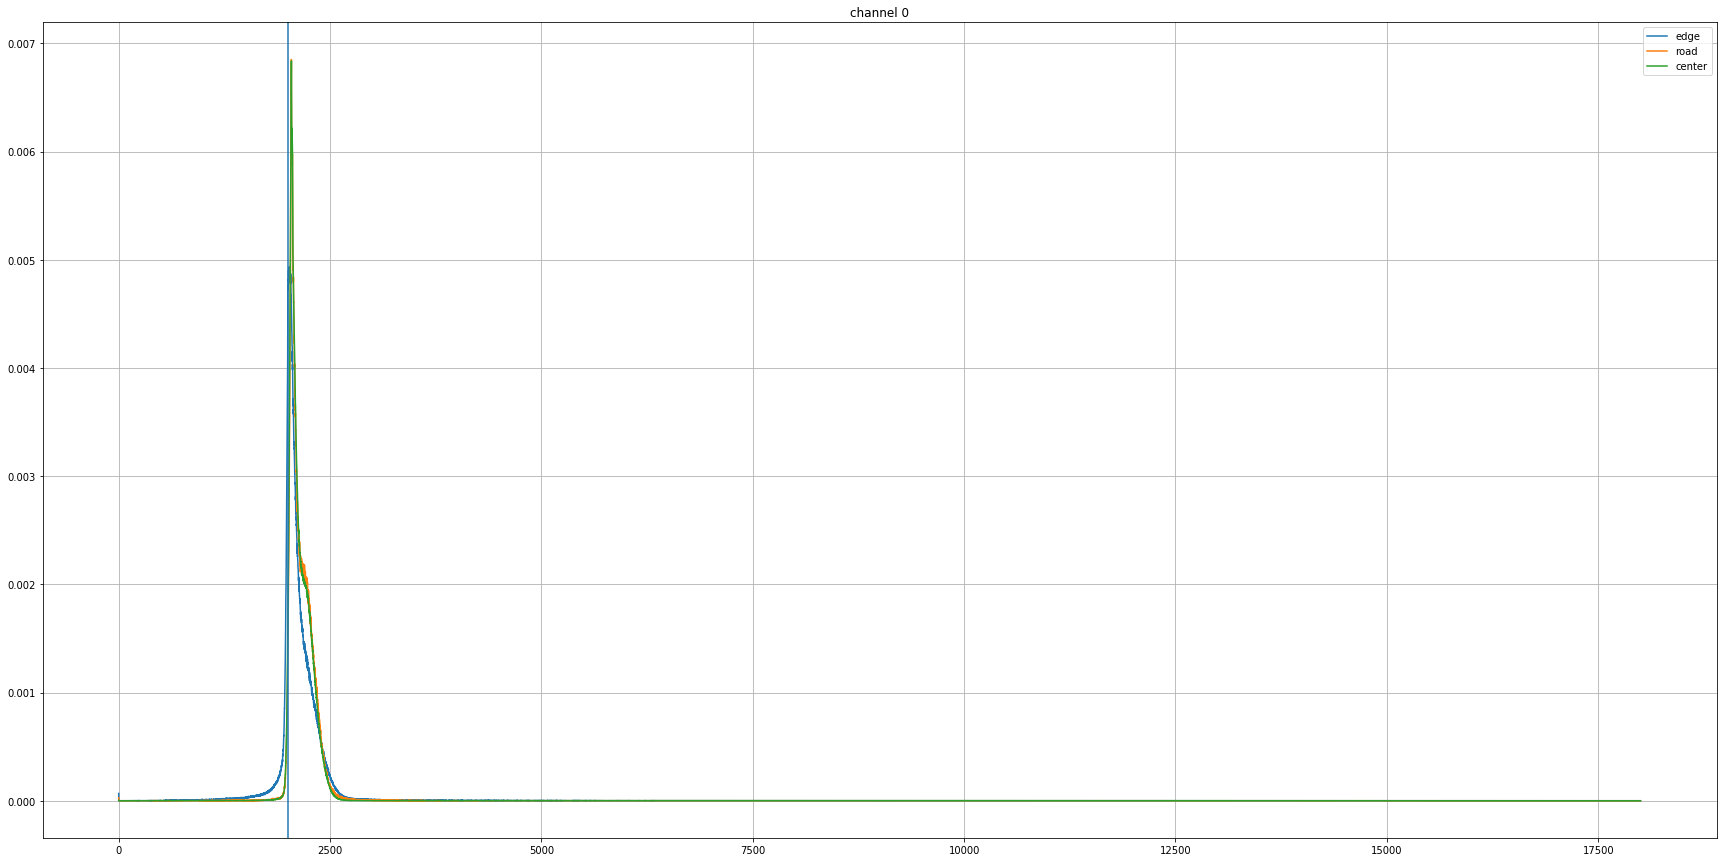

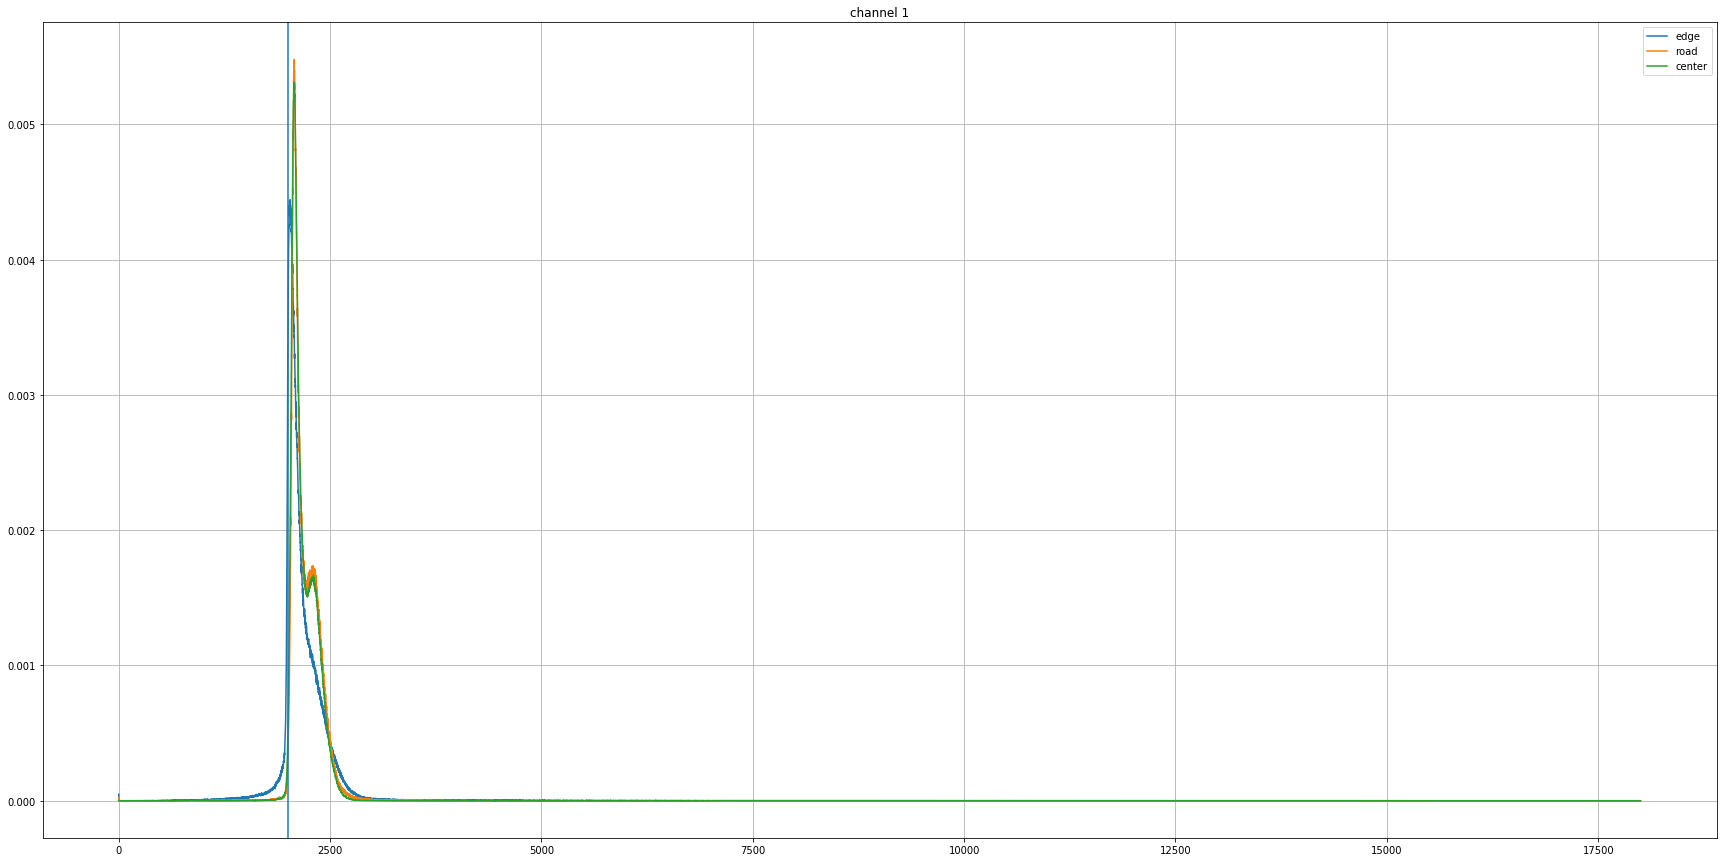

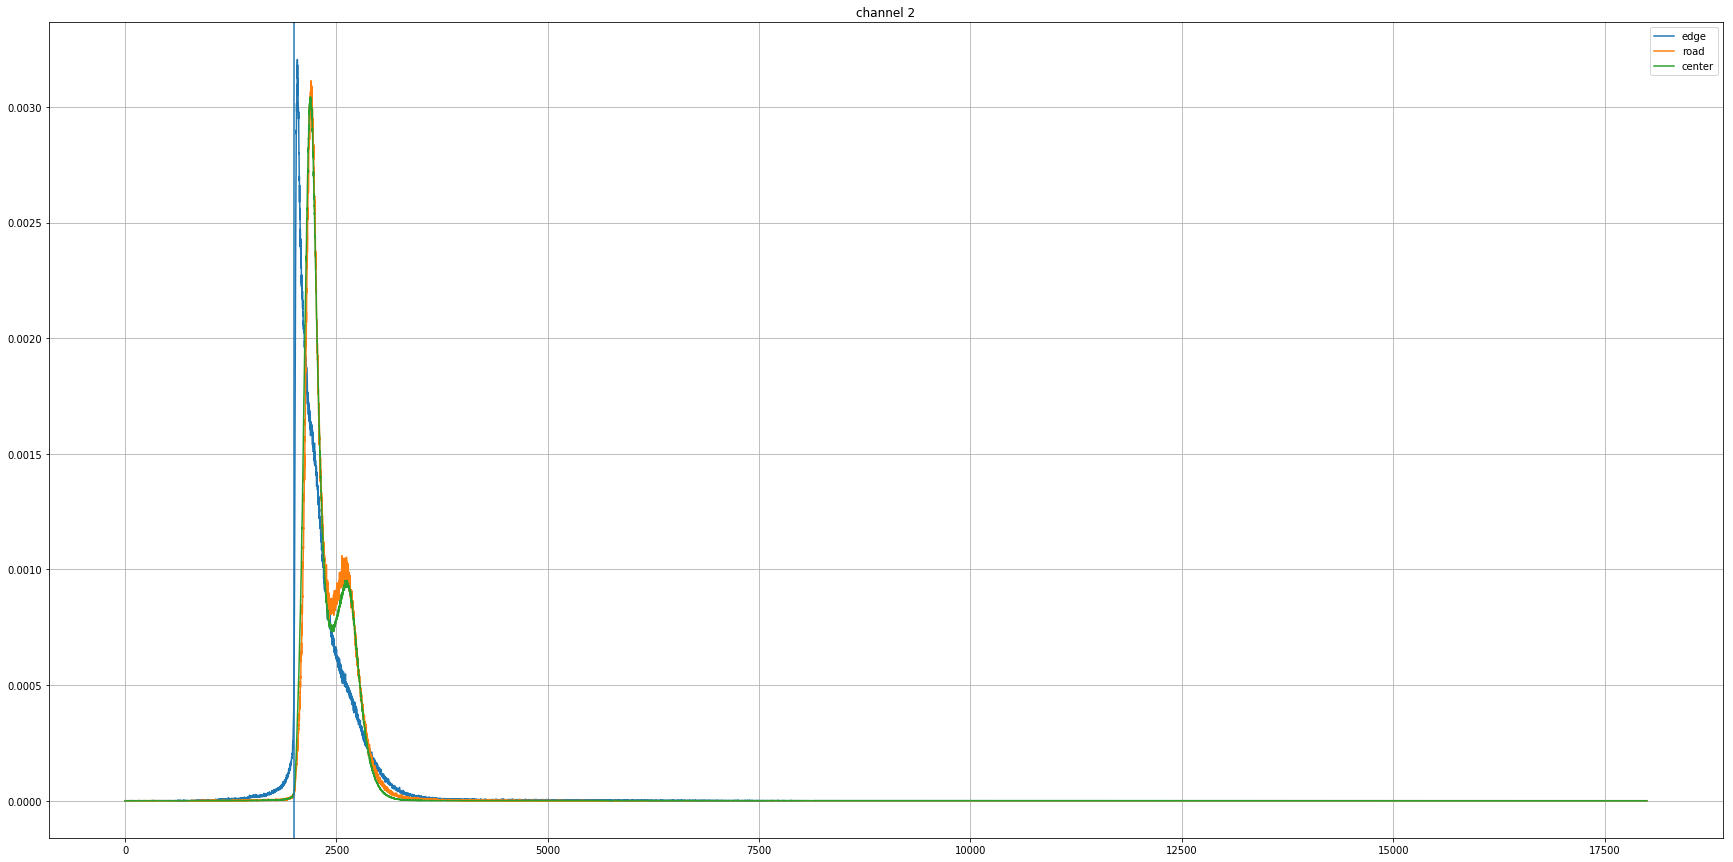

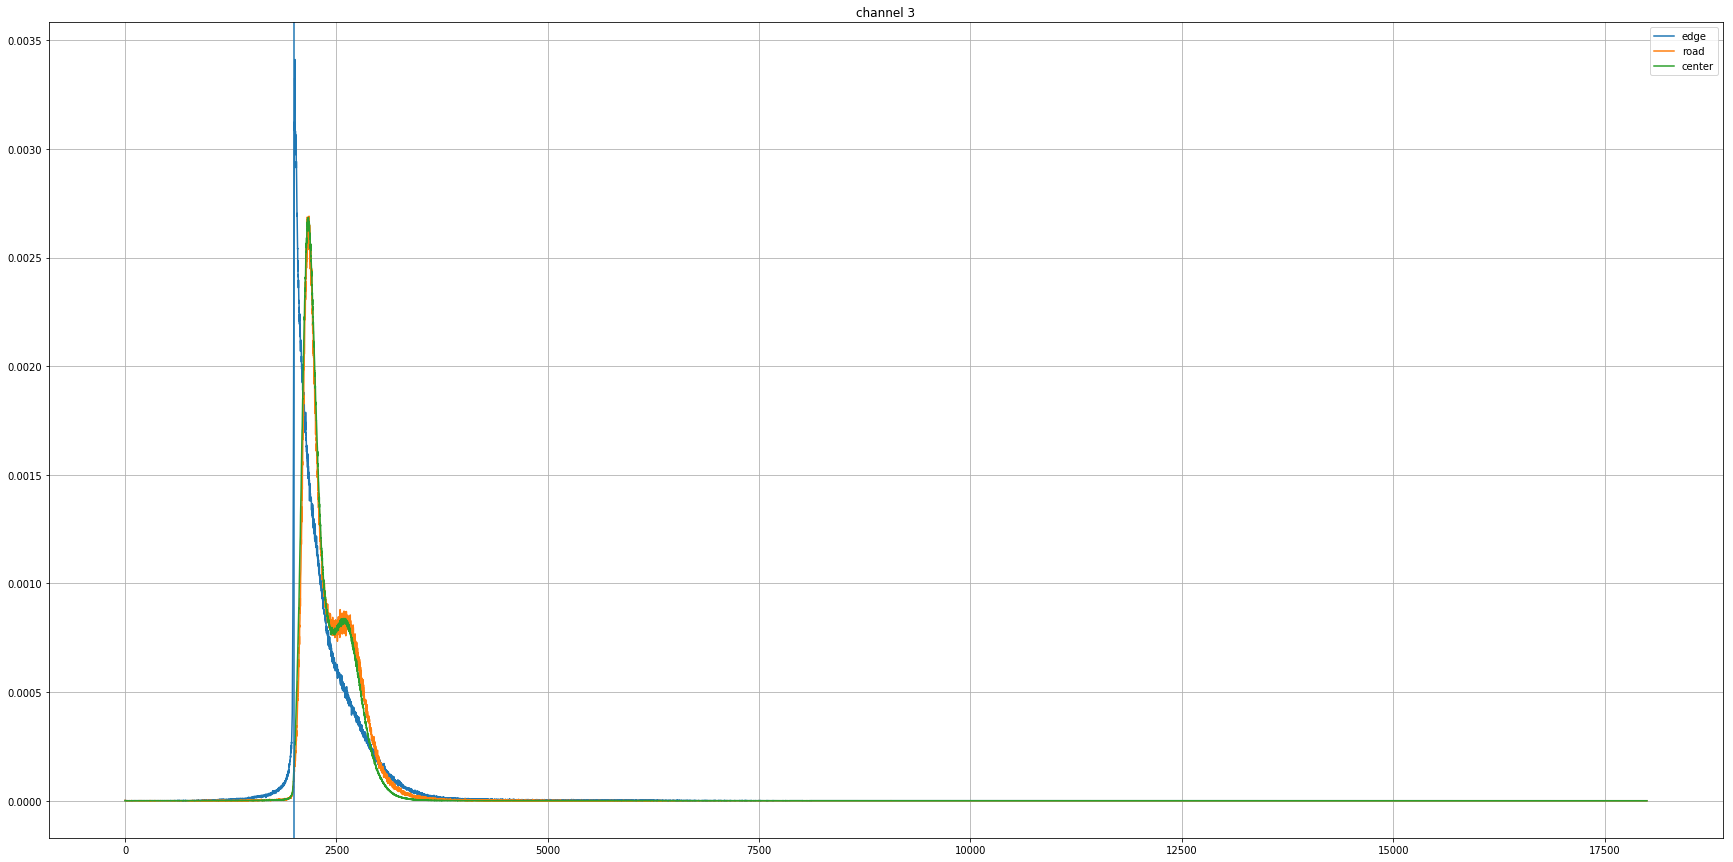

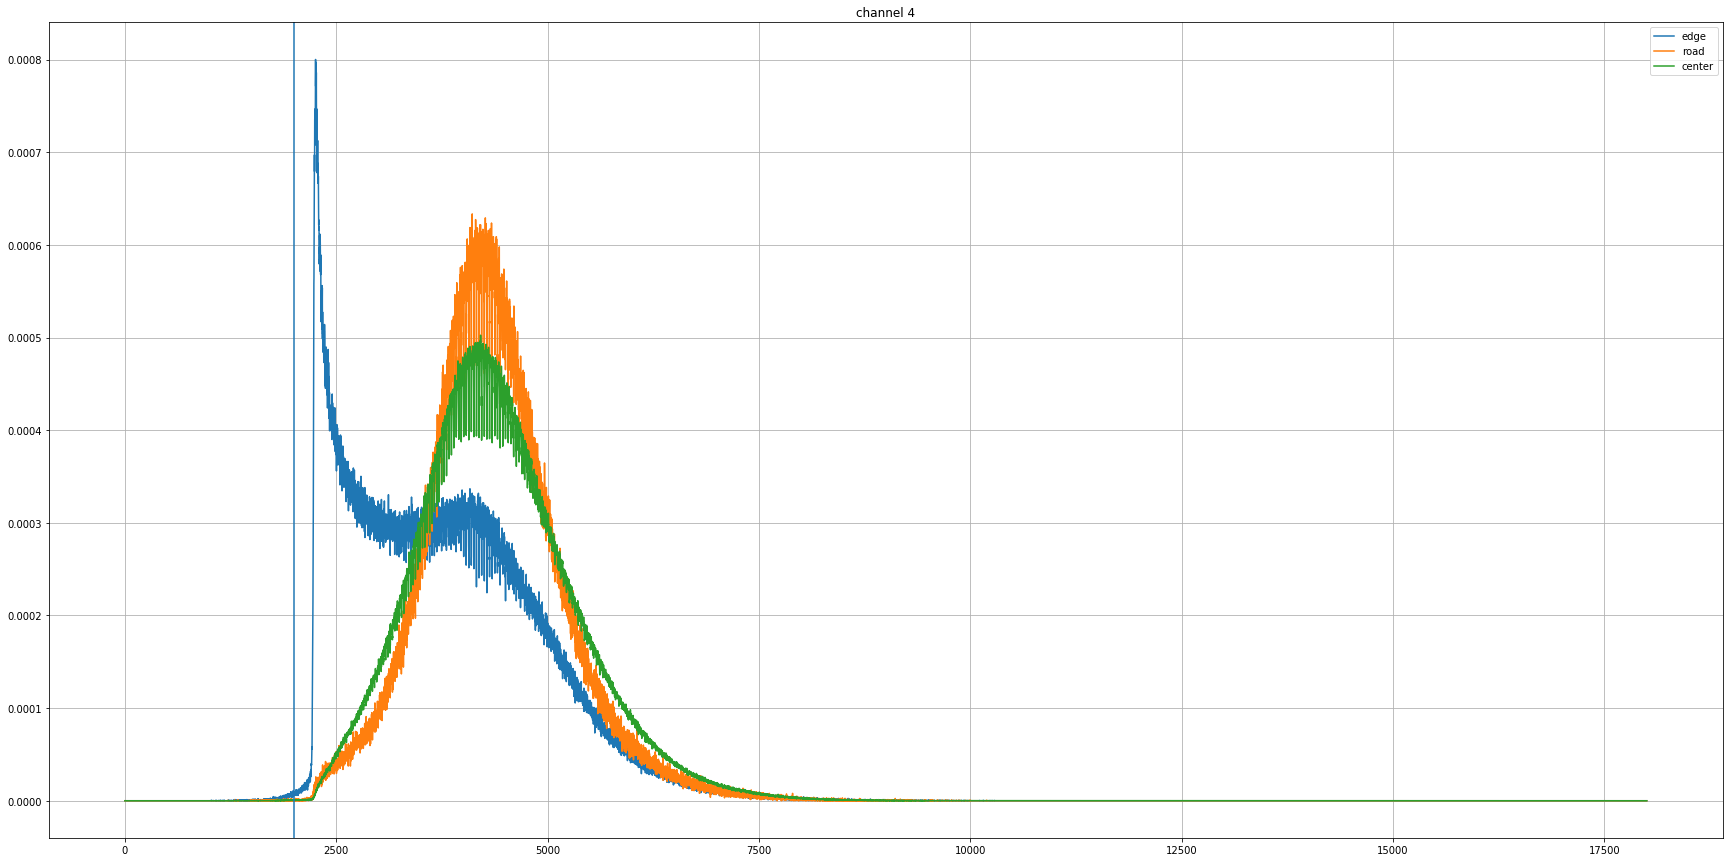

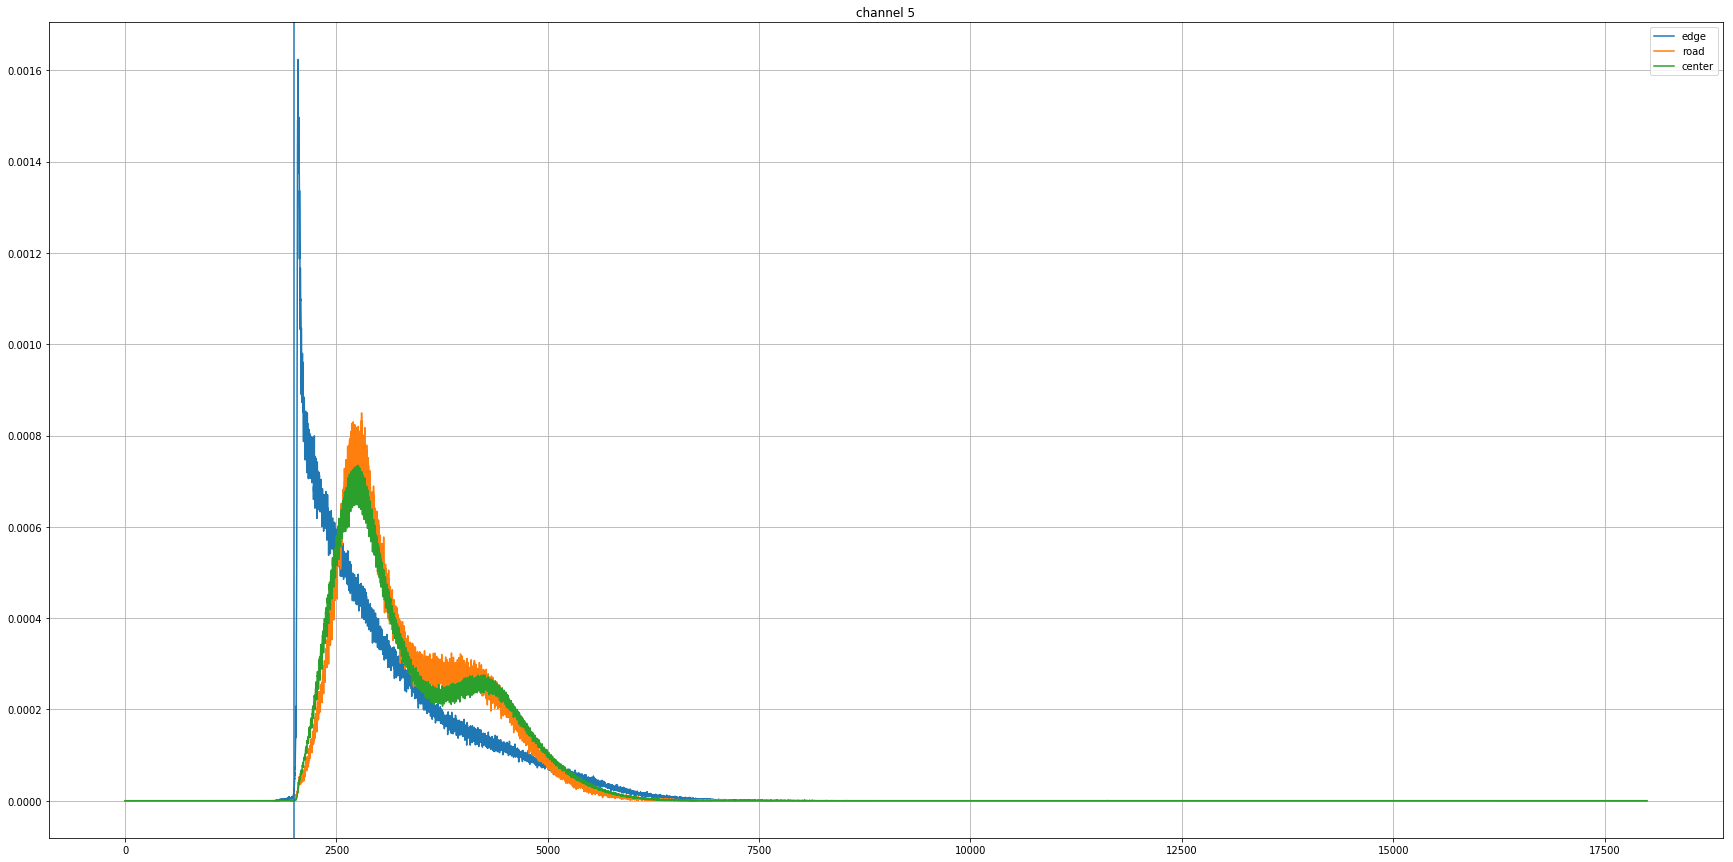

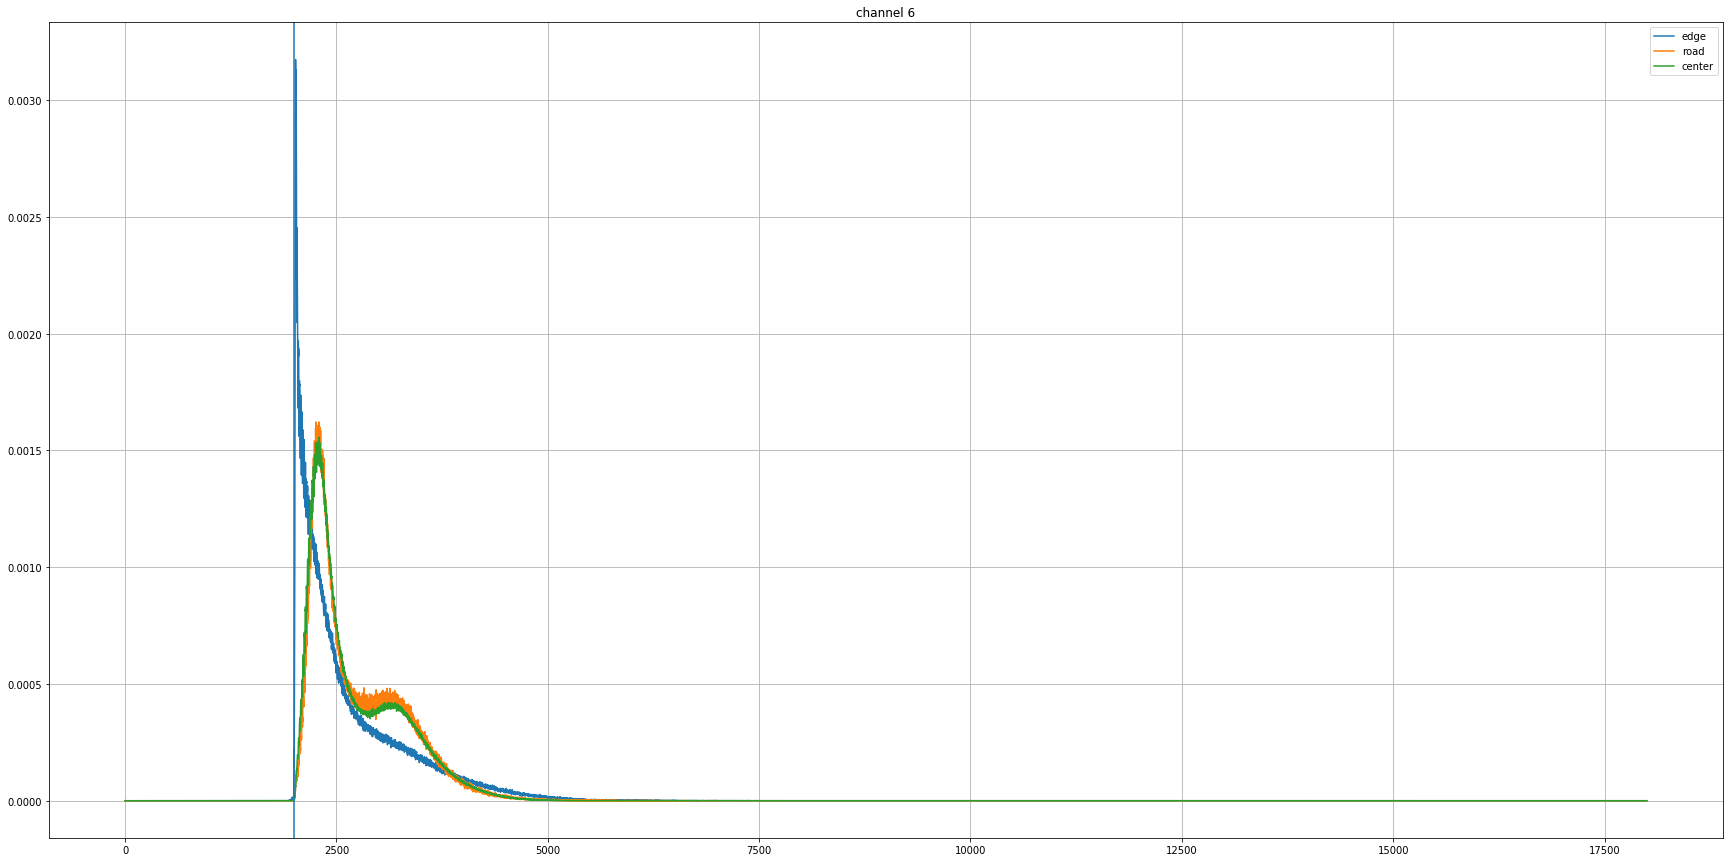

In [63]:
# Training - counted for road only when x-2:x+2, y-2:y+2 contains road
# Two subplots
for ch_n in range(7):
    plt.figure(figsize=(30,15))    
    plt.title('channel ' + str(ch_n))
    plt.plot(train_edge_distr_array[ch_n]/train_edge_distr_array[ch_n].sum(), label='edge')
    plt.plot(train_road_distr_array[ch_n]/train_road_distr_array[ch_n].sum(), label='road')
    plt.plot(train_center_distr_array[ch_n]/train_center_distr_array[ch_n].sum(), label='center')

    plt.axvline(x=-offset)
    plt.legend()
    plt.grid(True)
    # plt.savefig('./Result/Channel Analysis/train_channel_' + str(ch_n) + '.png')
    plt.show()
    plt.close()

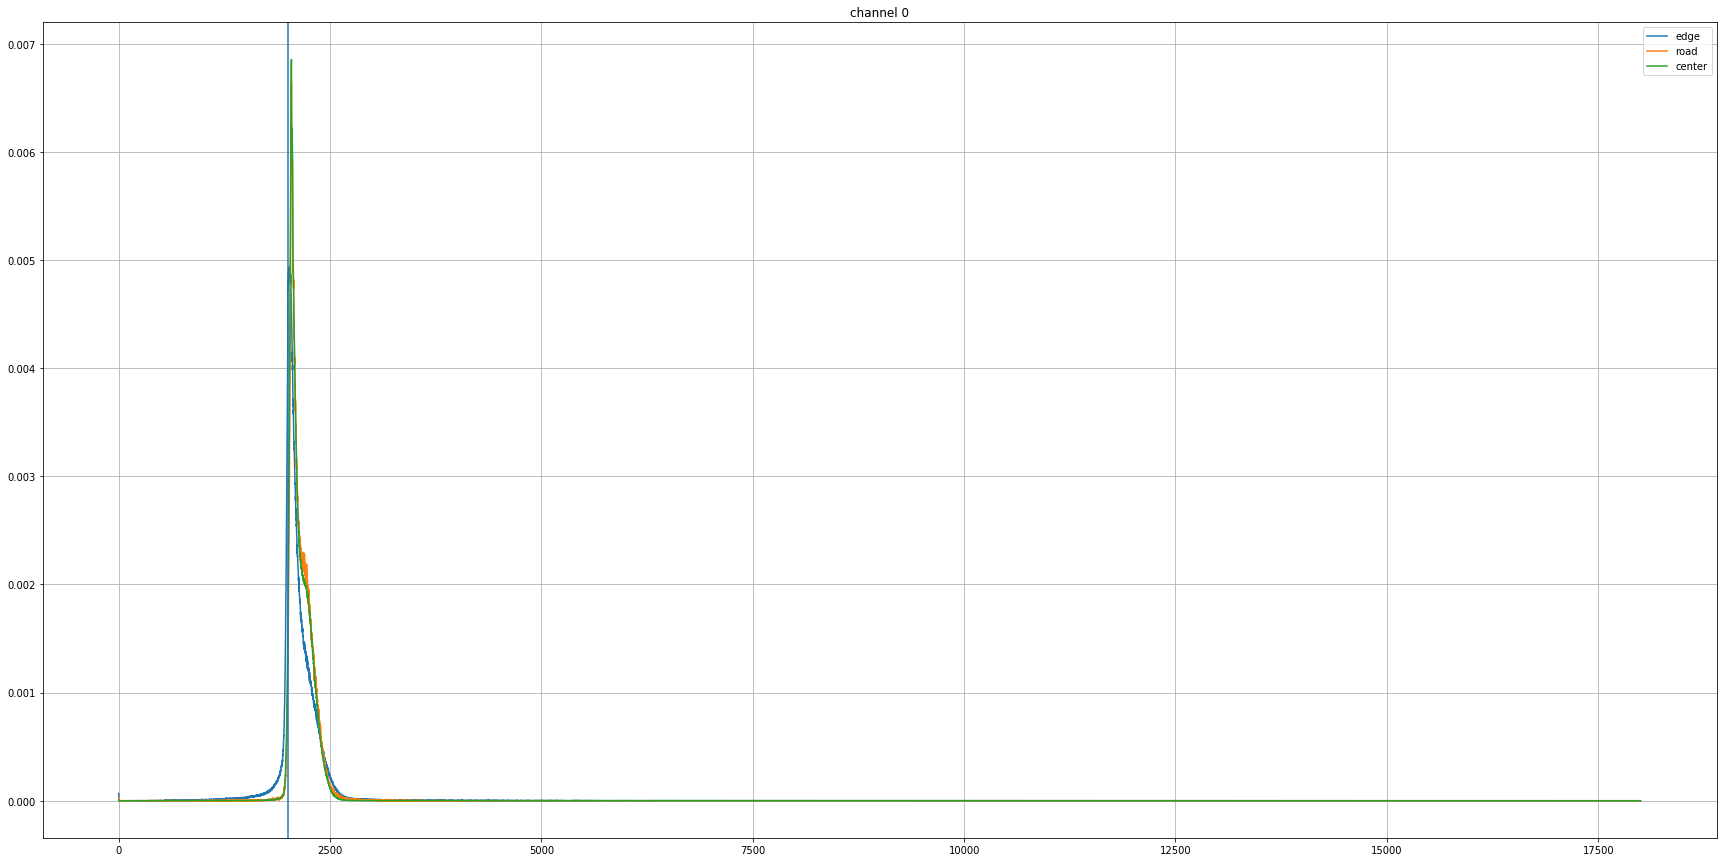

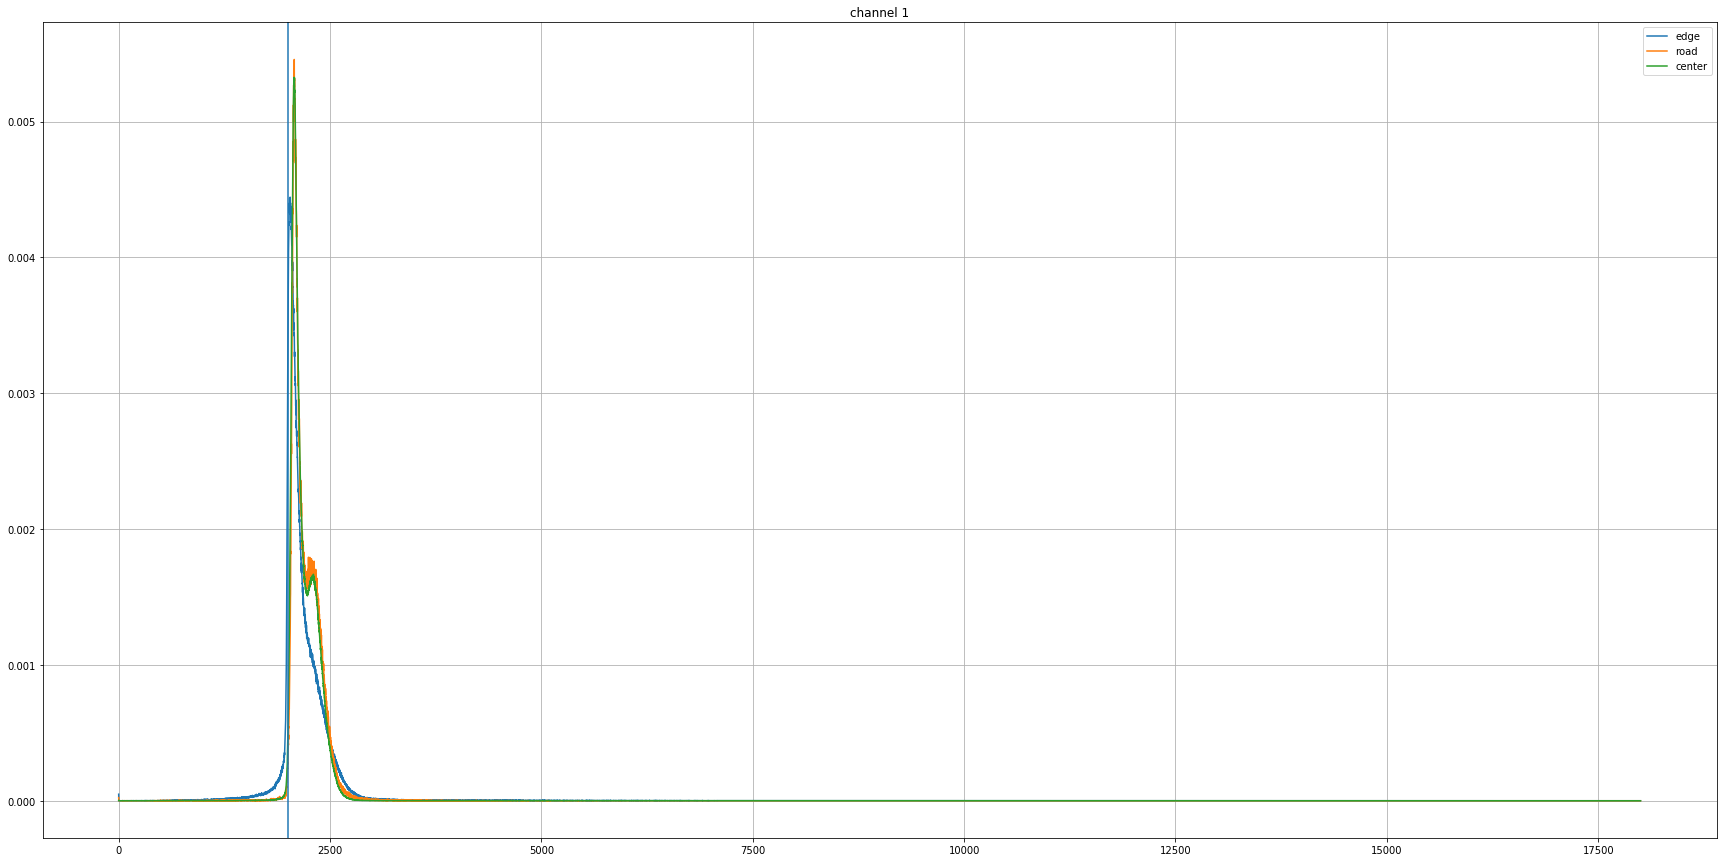

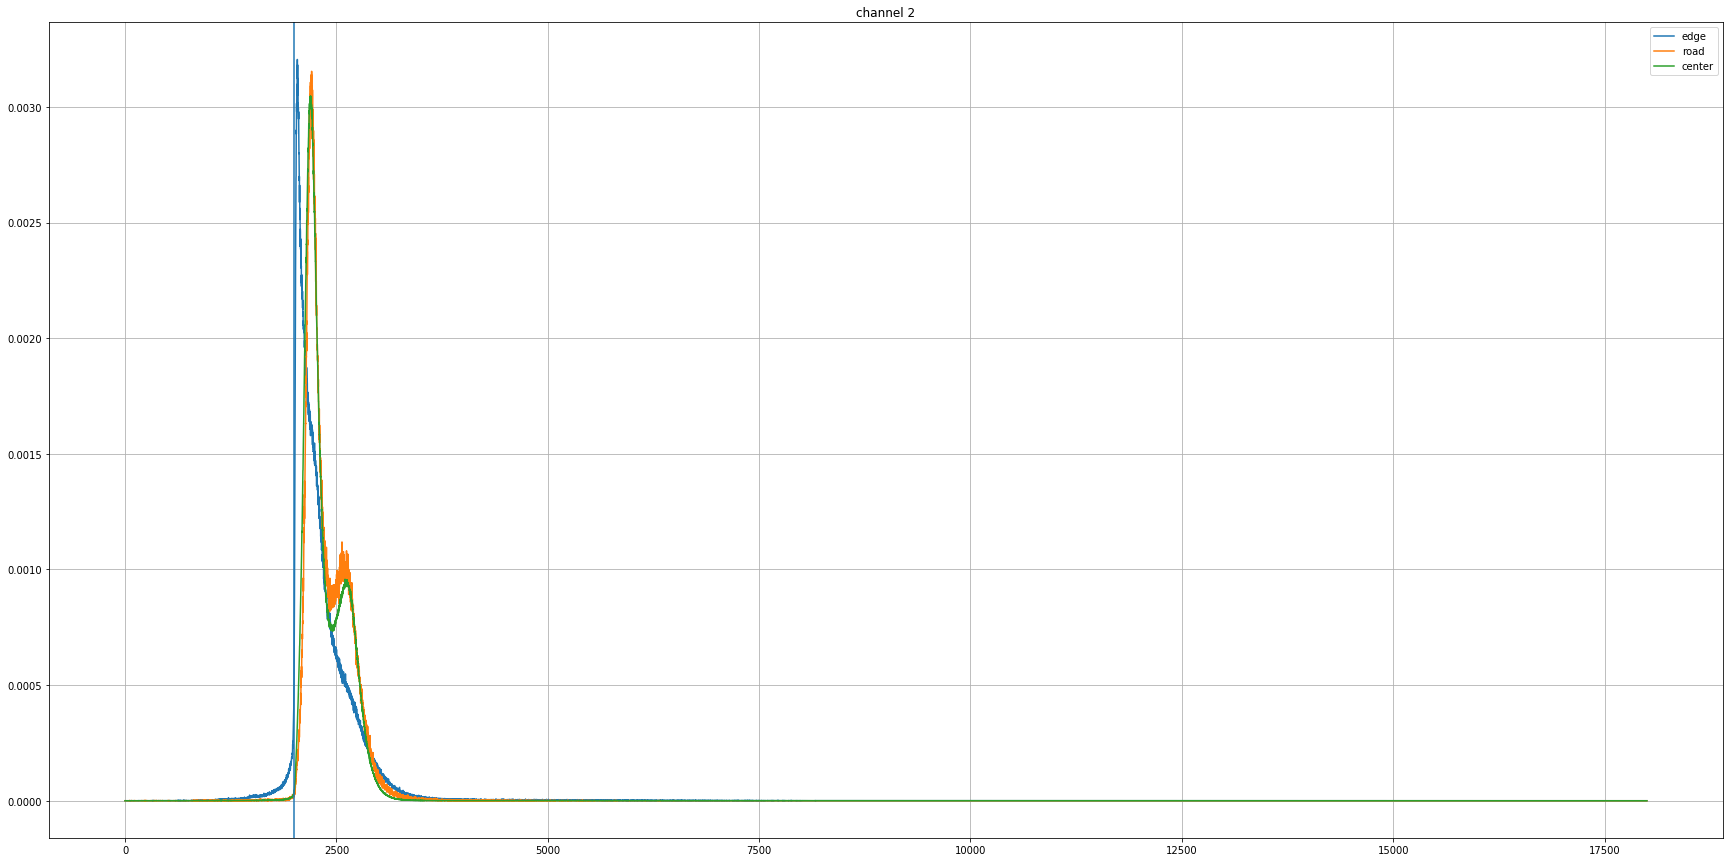

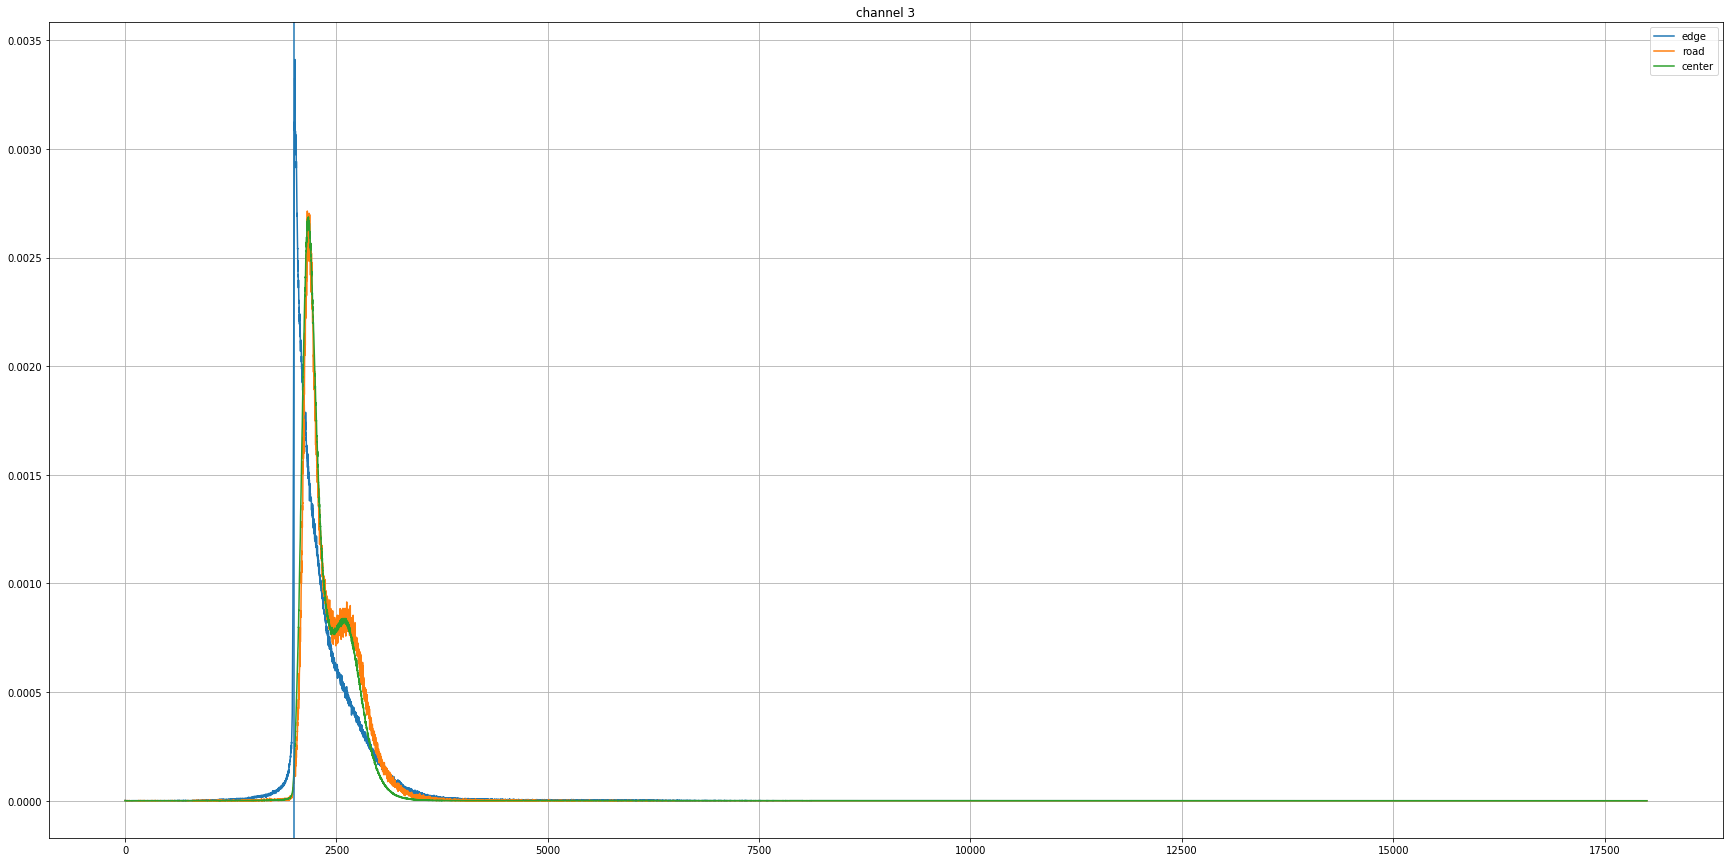

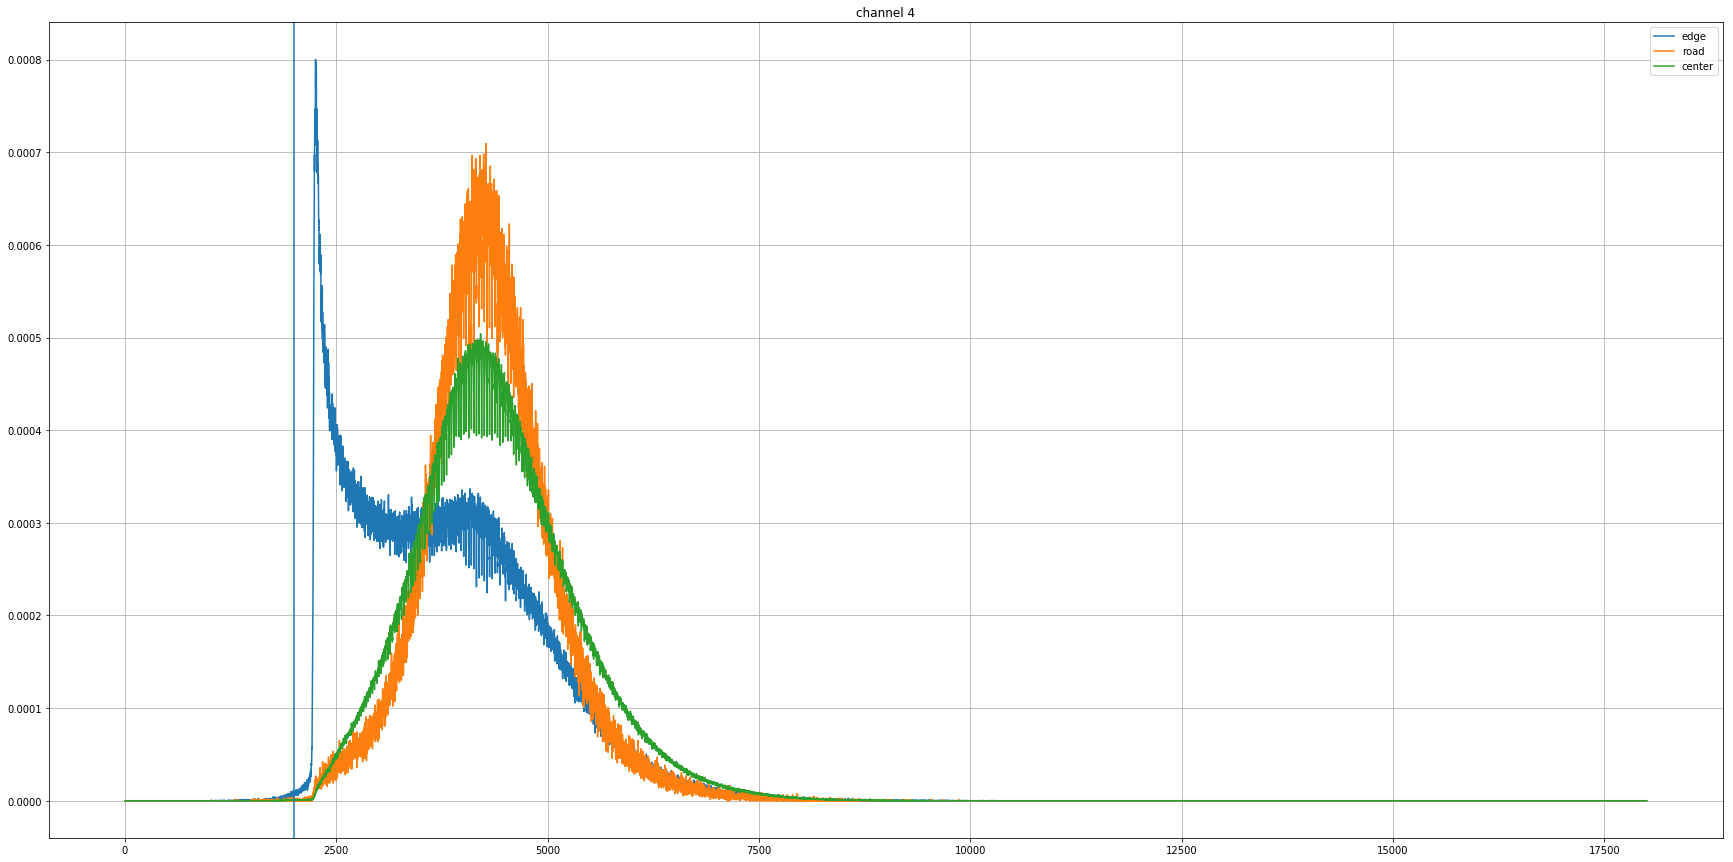

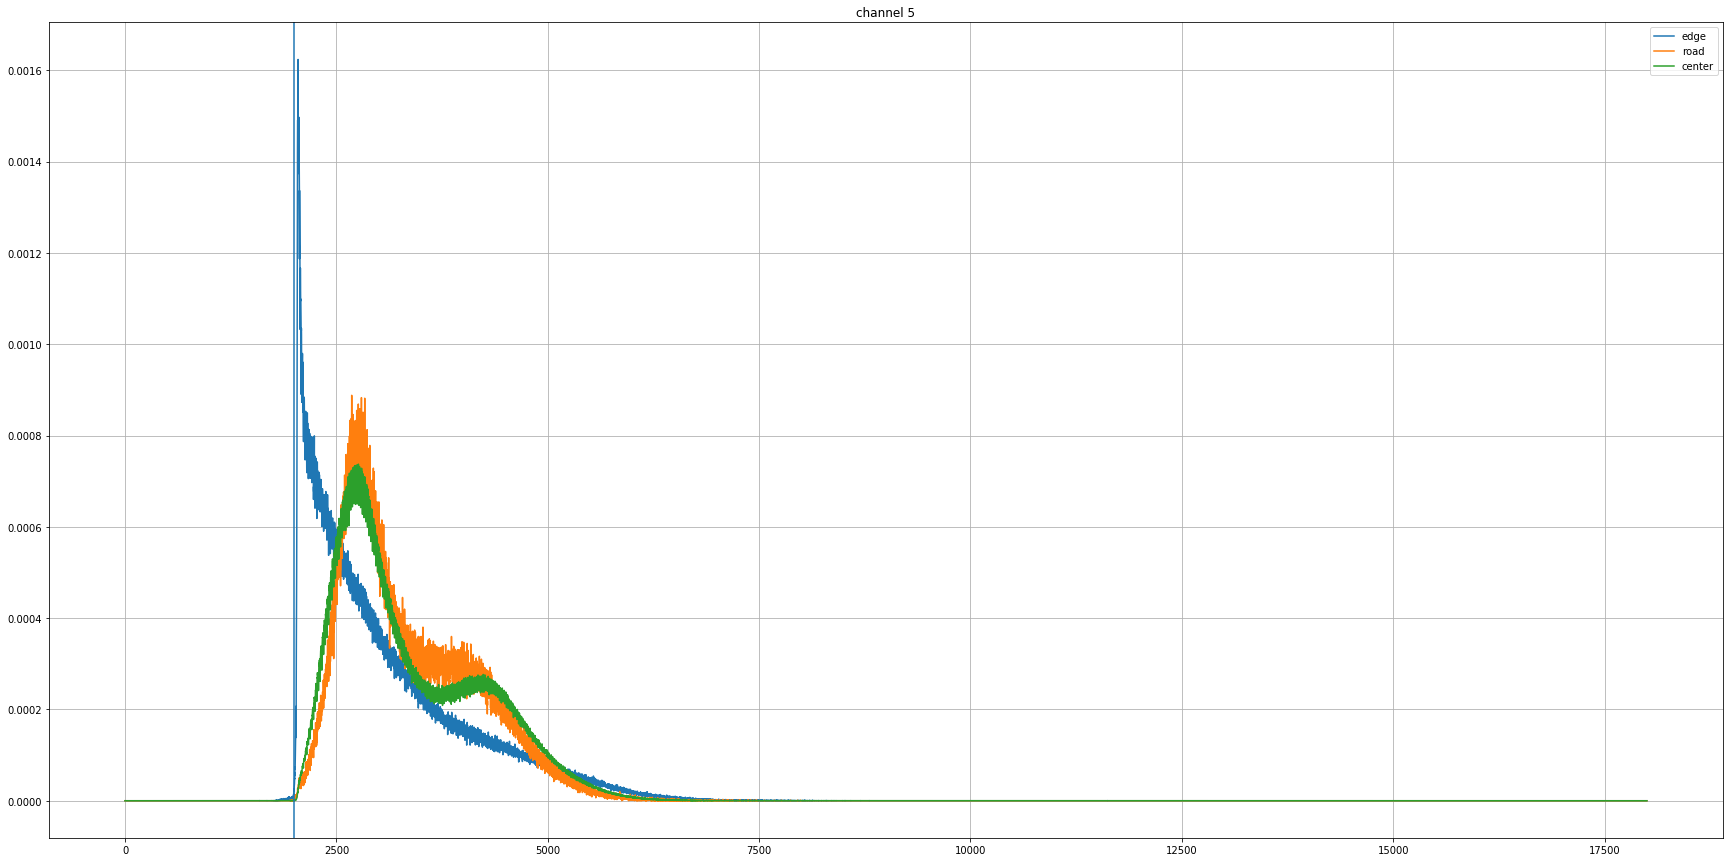

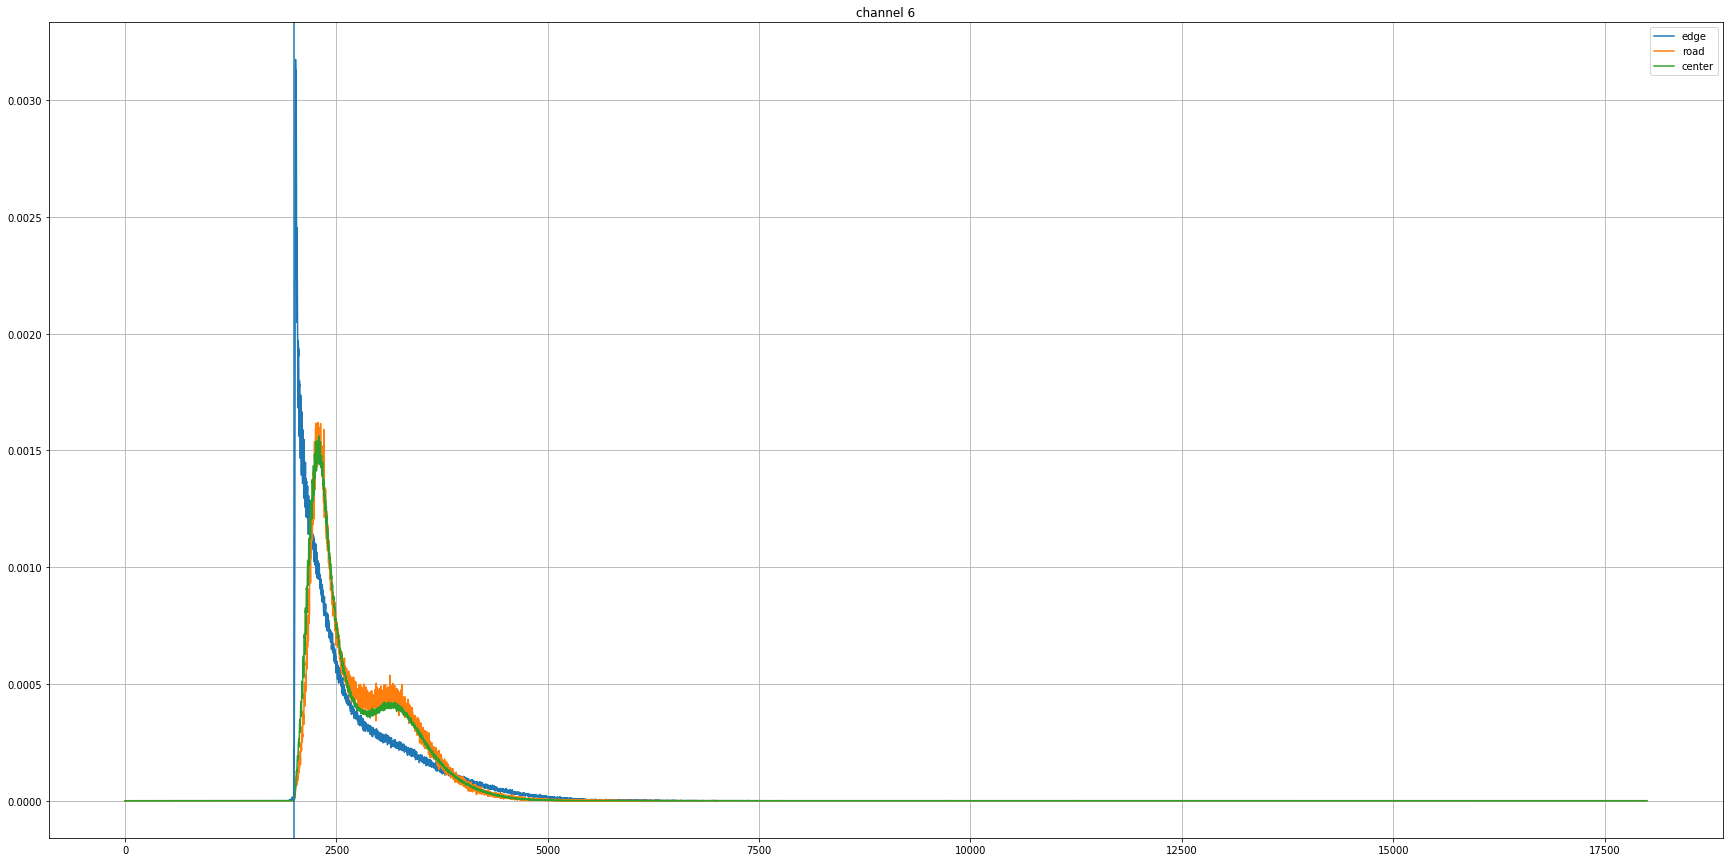

In [56]:
# Training - counted for road only when x-1:x+1, y-1:y+1 contains road
# Two subplots
for ch_n in range(7):
    plt.figure(figsize=(30,15))    
    plt.title('channel ' + str(ch_n))

    plt.plot(train_edge_distr_array[ch_n]/train_edge_distr_array[ch_n].sum(), label='edge')
    plt.plot(train_road_distr_array[ch_n]/train_road_distr_array[ch_n].sum(), label='road')
    plt.plot(train_center_distr_array[ch_n]/train_center_distr_array[ch_n].sum(), label='center')

    plt.axvline(x=-offset)
    plt.legend()
    plt.grid(True)
    plt.savefig('./Result/Channel Analysis/train_channel_' + str(ch_n) + '.png')
    plt.show()
    plt.close()

In [57]:
cv_edge_distr_array = np.zeros((7, int(max_idx)))
cv_road_distr_array = np.zeros((7, int(max_idx)))
cv_center_distr_array = np.zeros((7, int(max_idx)))

for ch_n in range(7):
    for x in range(CV_road_mask.shape[0]):
        for y in range(CV_road_mask.shape[1]):
            cnt_edge = (CV_raw_image[ch_n][x,y] != -9999 and (CV_raw_image[ch_n][x-4:x+4,y-4:y+4] == -9999).any() )
            cnt_road = (CV_raw_image[ch_n][x,y] != -9999 and (CV_road_mask[x-1:x+1,y-1:y+1] == 1).any())
            cnt_center = ((CV_raw_image[ch_n][x,y] != -9999) and (not cnt_edge) and (not cnt_road))

            val = int(CV_raw_image[ch_n][x,y] - offset)

            if cnt_edge: cv_edge_distr_array[ch_n][val] += 1
            if cnt_road: cv_road_distr_array[ch_n][val] += 1
            if cnt_center: cv_center_distr_array[ch_n][val] += 1

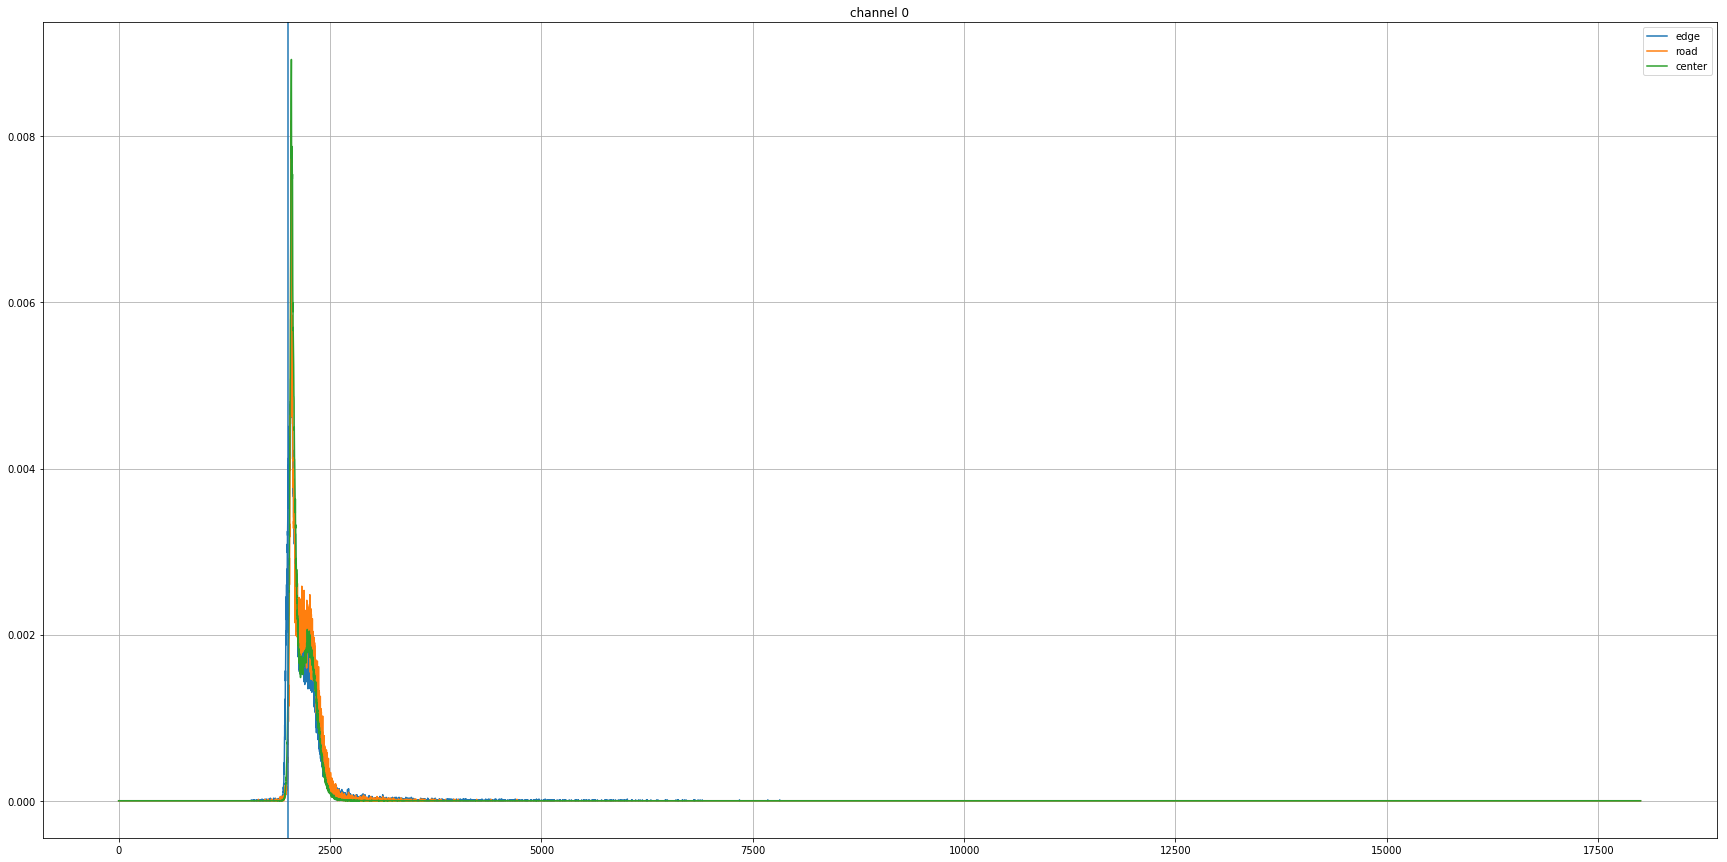

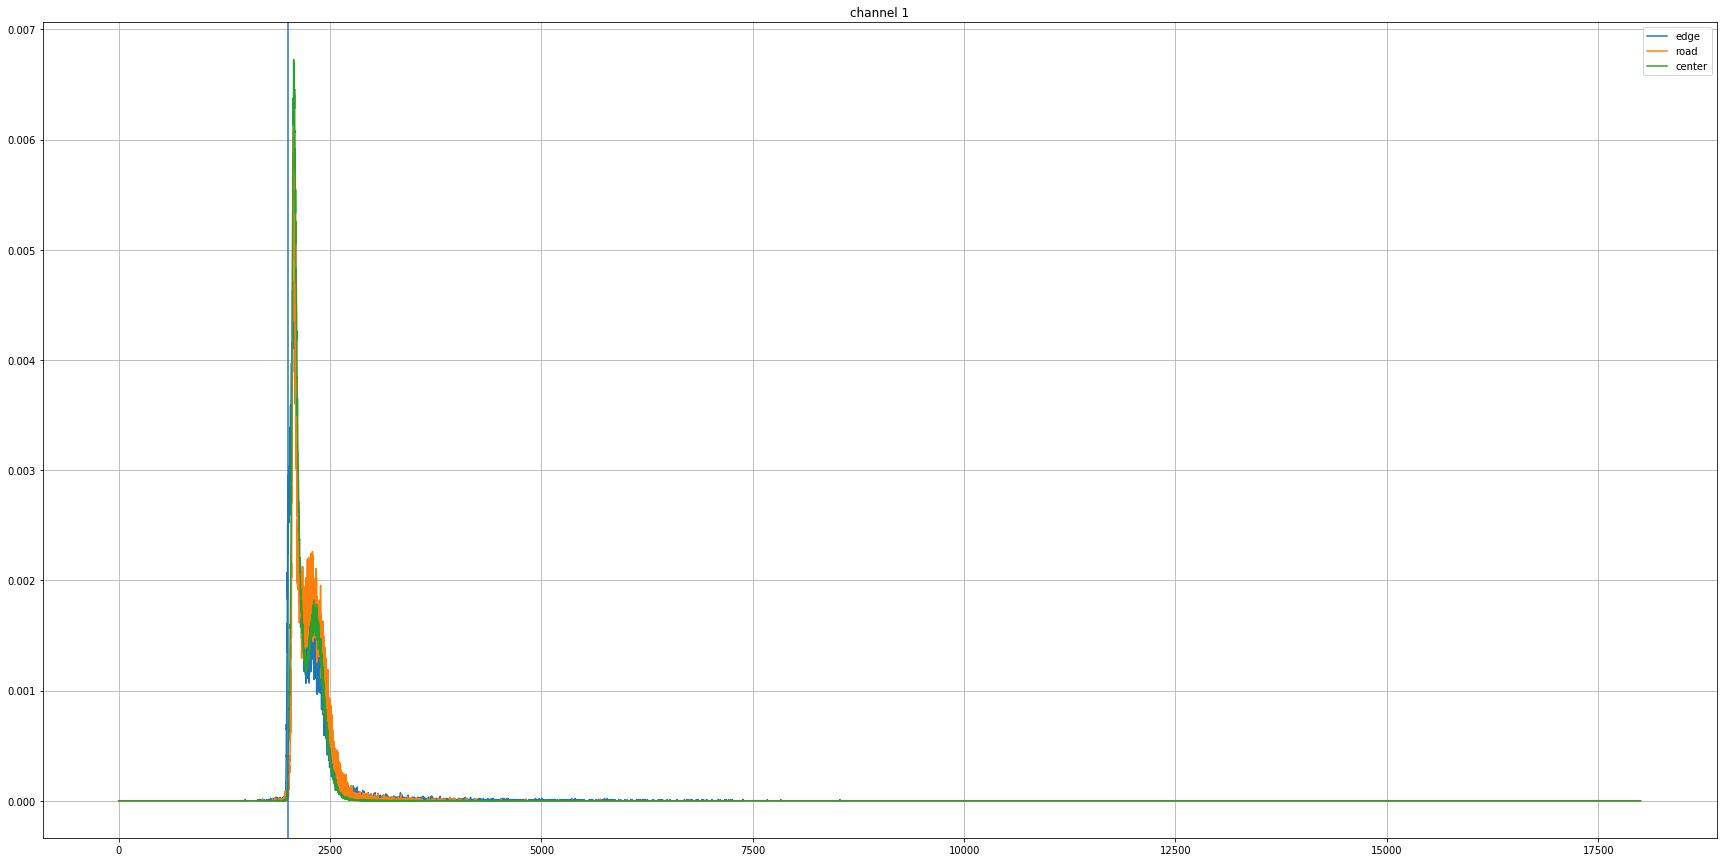

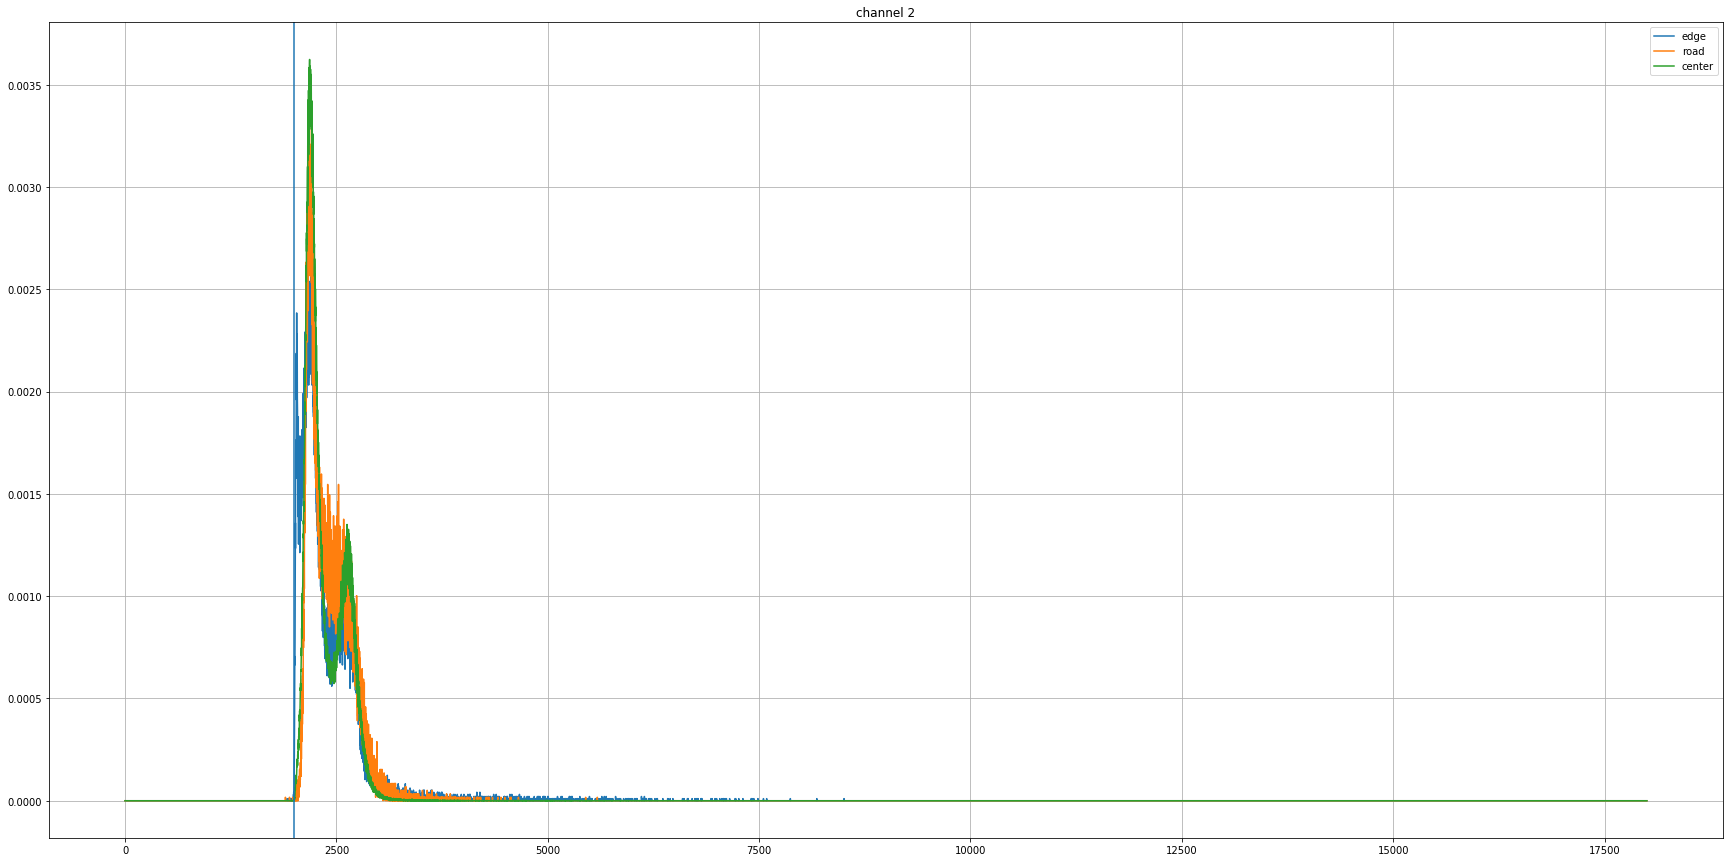

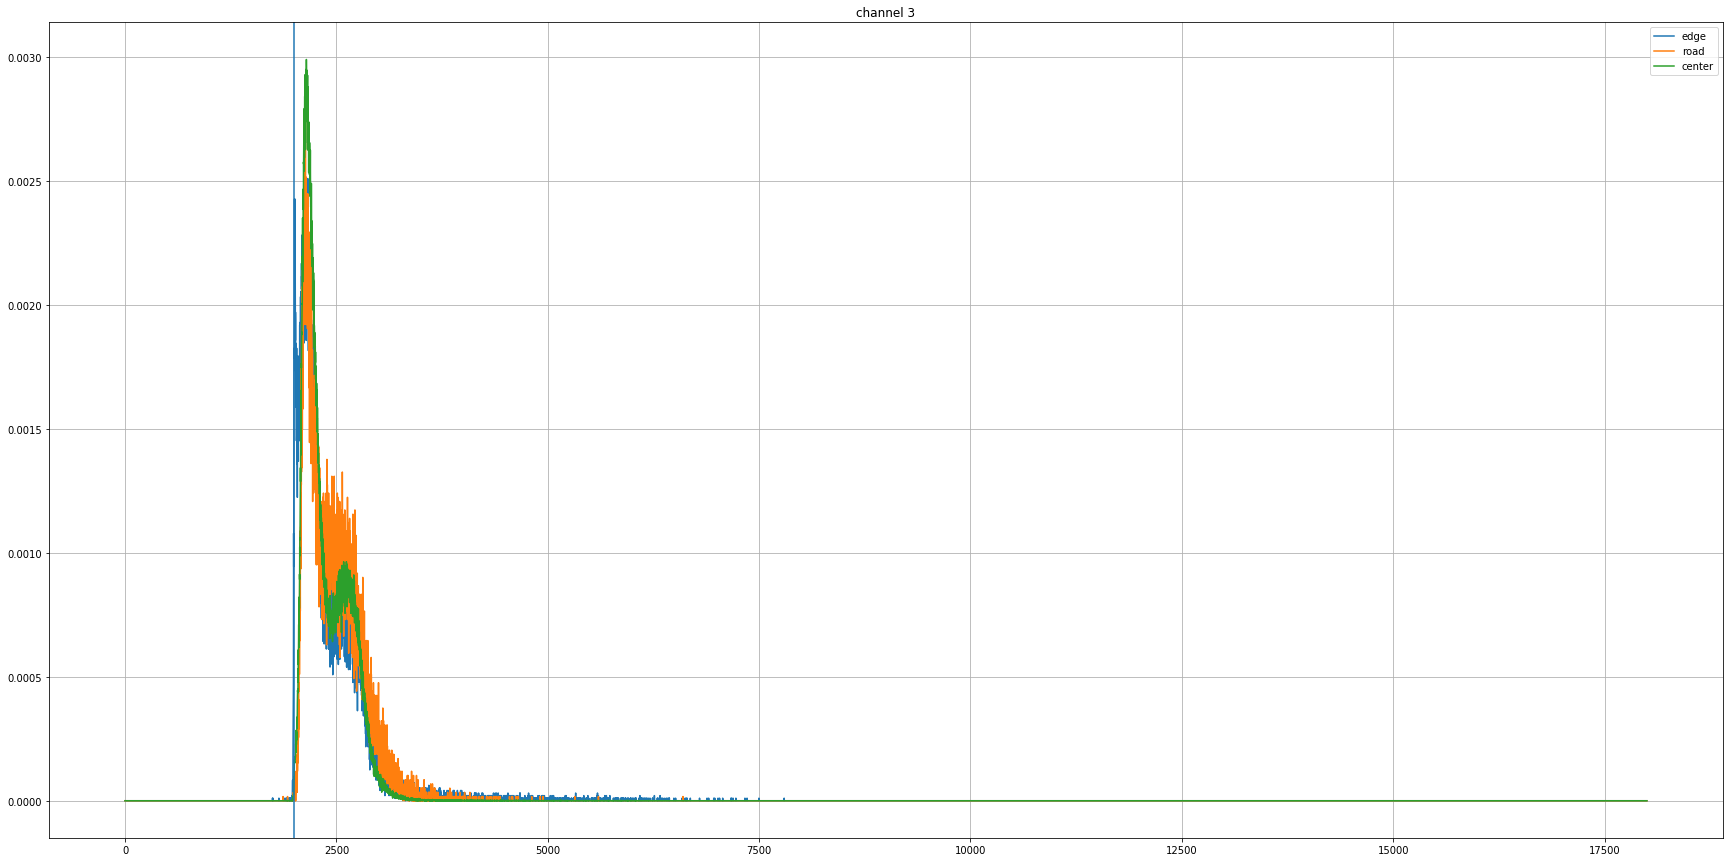

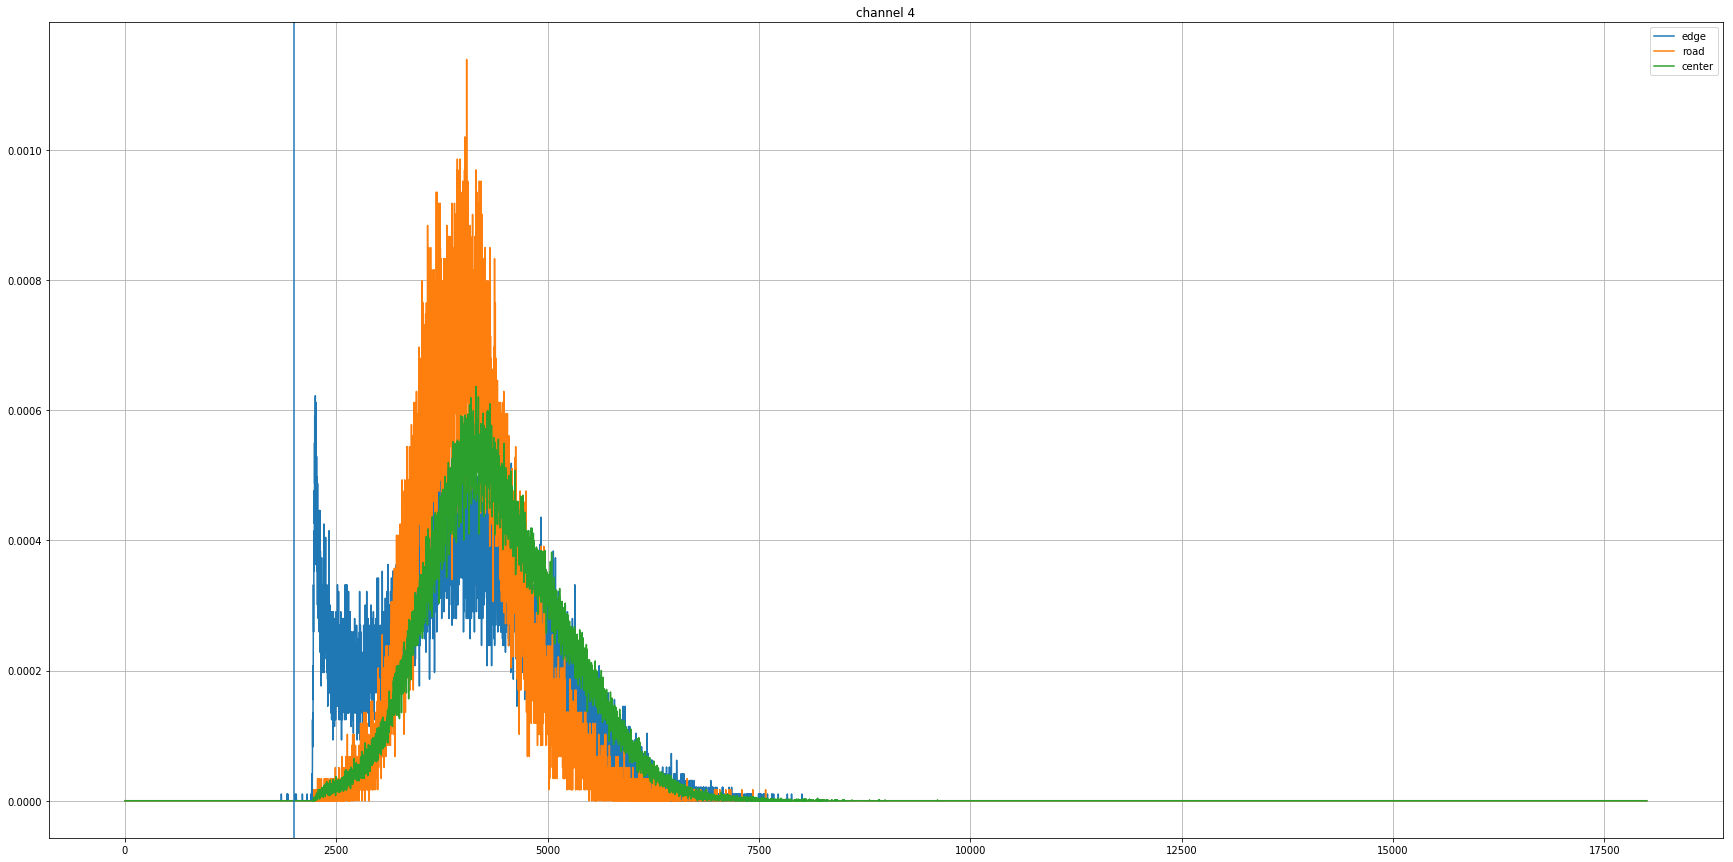

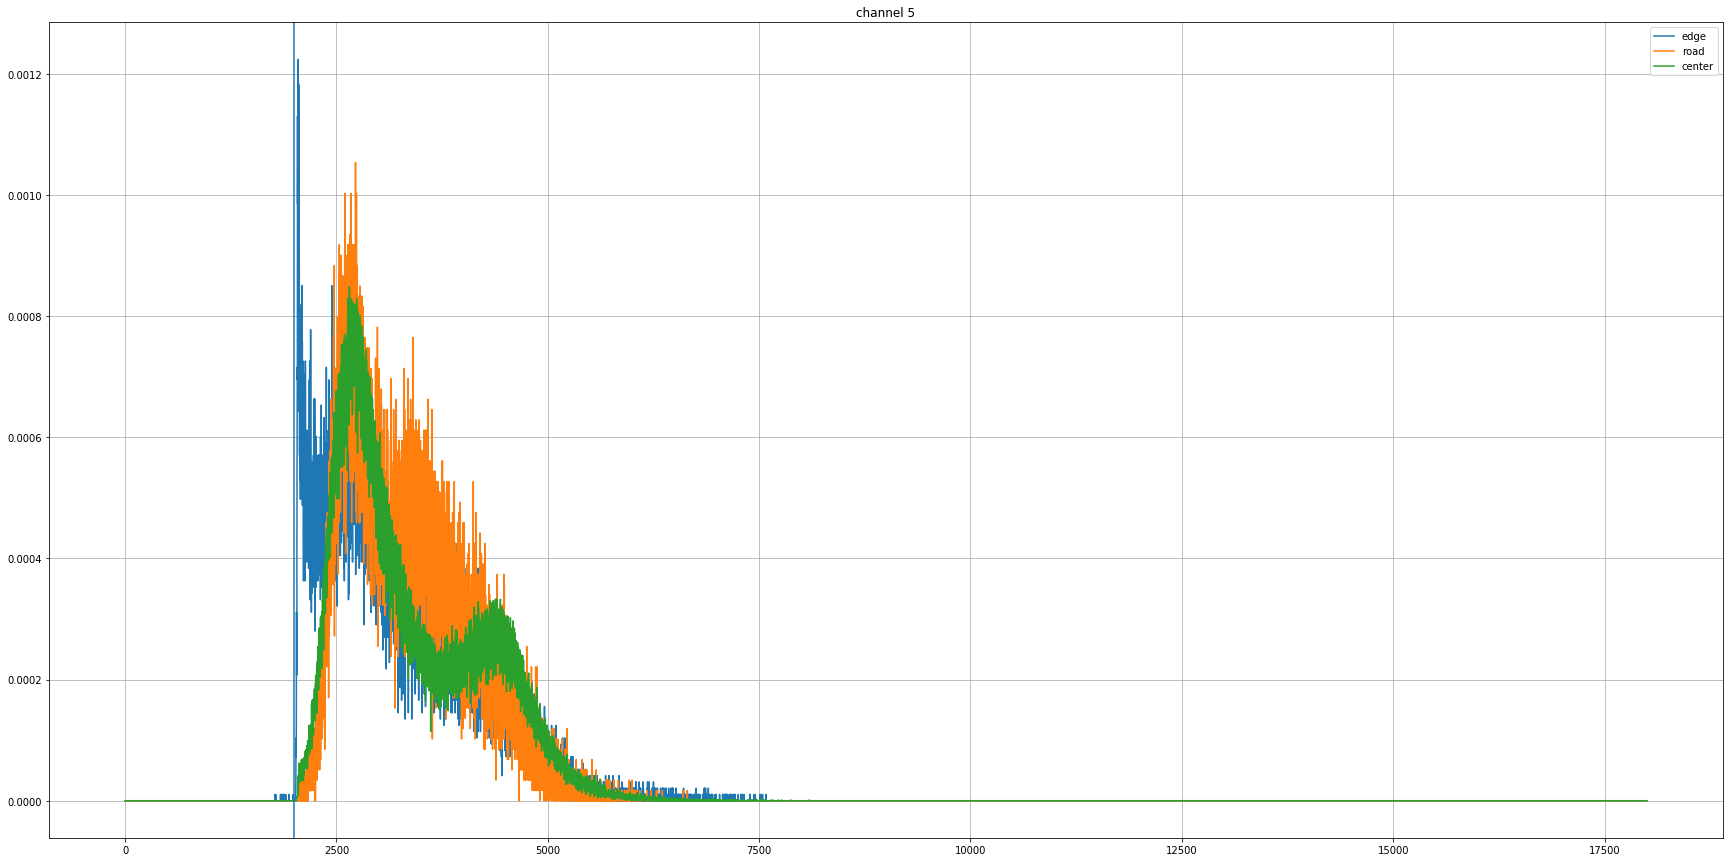

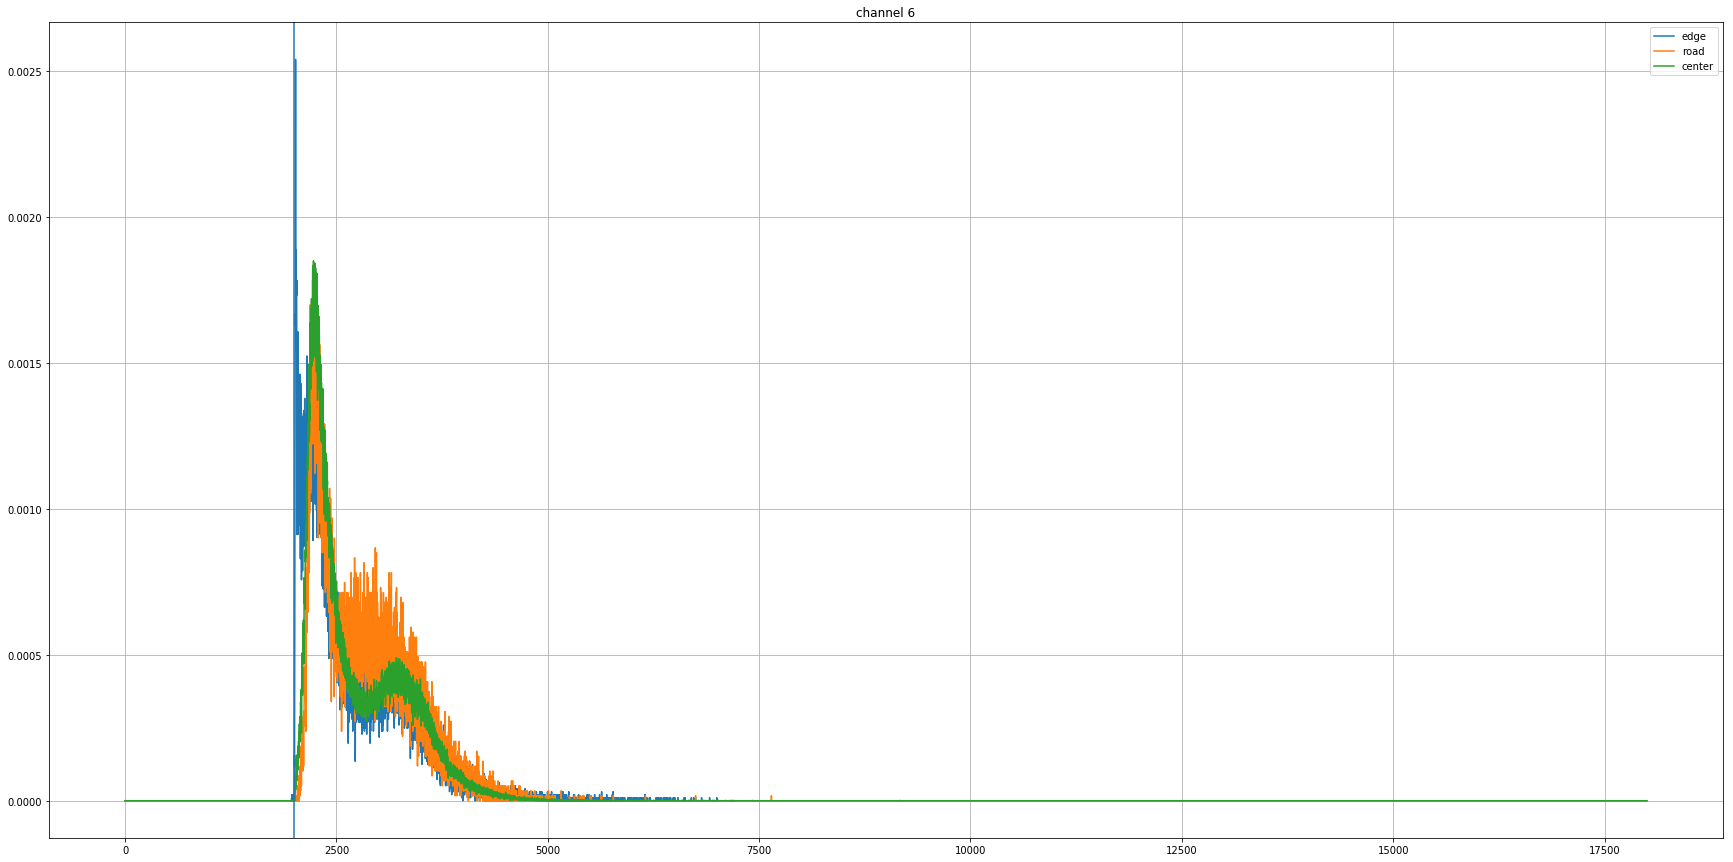

In [58]:
# Two subplots
for ch_n in range(7):
    plt.figure(figsize=(30,15))    
    plt.title('channel ' + str(ch_n))

    plt.plot(cv_edge_distr_array[ch_n]/cv_edge_distr_array[ch_n].sum(), label='edge')
    plt.plot(cv_road_distr_array[ch_n]/cv_road_distr_array[ch_n].sum(), label='road')
    plt.plot(cv_center_distr_array[ch_n]/cv_center_distr_array[ch_n].sum(), label='center')

    plt.axvline(x=-offset)
    plt.legend()
    plt.grid(True)
    plt.savefig('./Result/Channel Analysis/CV_channel_' + str(ch_n) + '.png')
    plt.show()
    plt.close()

In [64]:
test_edge_distr_array = np.zeros((7, int(max_idx)))
test_road_distr_array = np.zeros((7, int(max_idx)))
test_center_distr_array = np.zeros((7, int(max_idx)))

for ch_n in range(7):
    for x in range(test_road_mask.shape[0]):
        for y in range(test_road_mask.shape[1]):
            cnt_edge = (test_raw_image[ch_n][x,y] != -9999 and (test_raw_image[ch_n][x-4:x+4,y-4:y+4] == -9999).any() )
            cnt_road = (test_raw_image[ch_n][x,y] != -9999 and (test_road_mask[x-1:x+1,y-1:y+1] == 1).any())
            cnt_center = ((test_raw_image[ch_n][x,y] != -9999) and (not cnt_edge) and (not cnt_road))

            val = int(test_raw_image[ch_n][x,y] - offset)

            if cnt_edge: test_edge_distr_array[ch_n][val] += 1
            if cnt_road: test_road_distr_array[ch_n][val] += 1
            if cnt_center: test_center_distr_array[ch_n][val] += 1

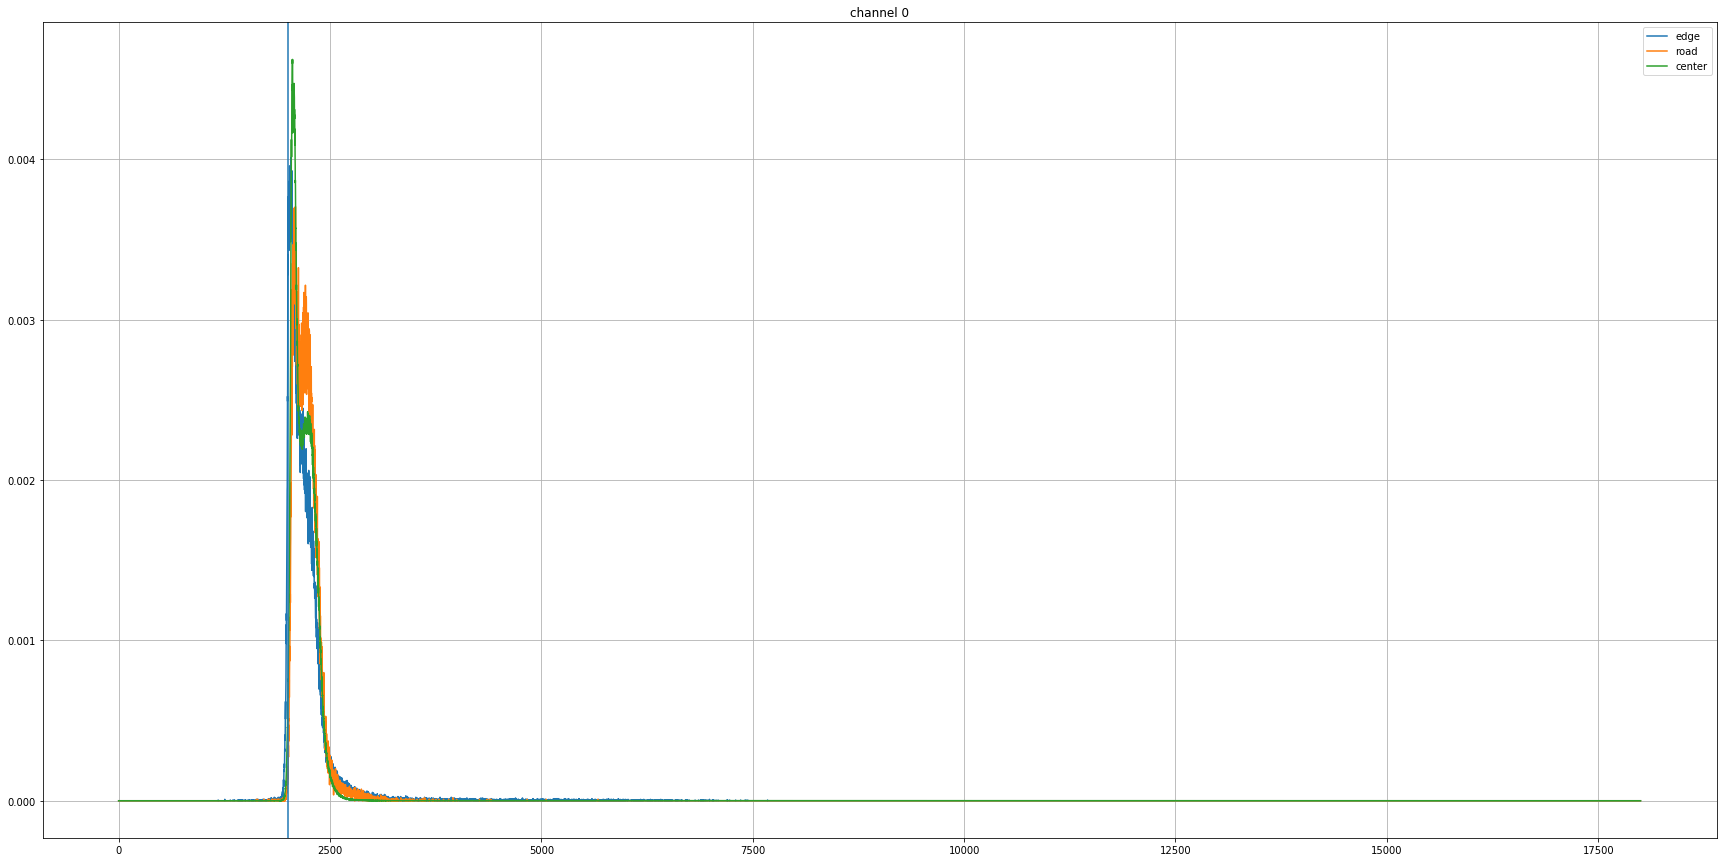

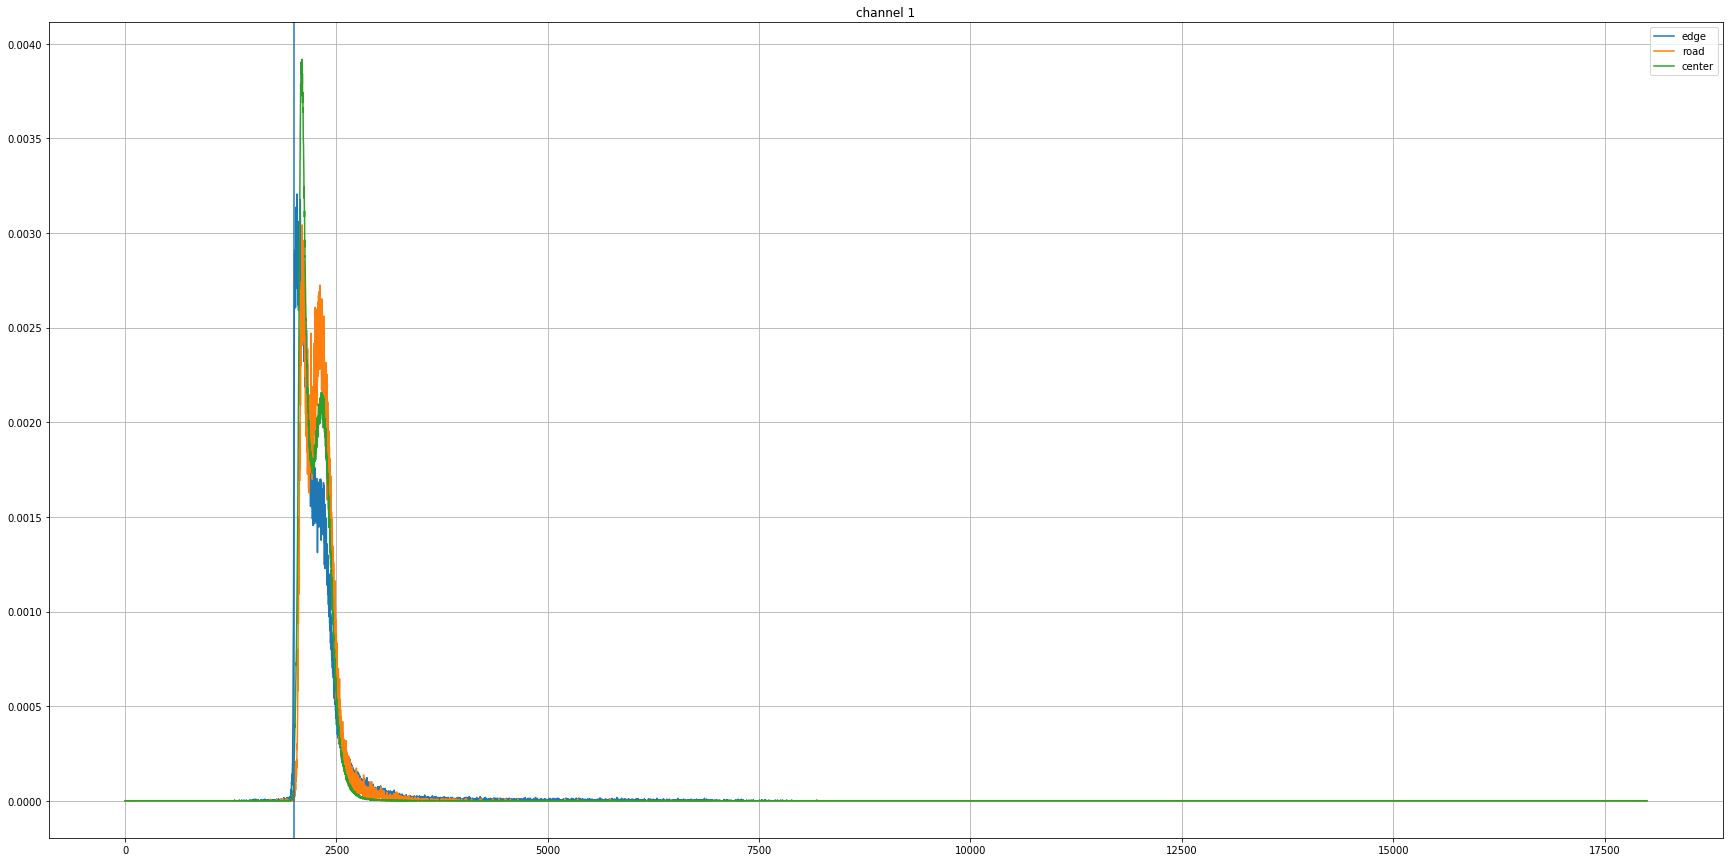

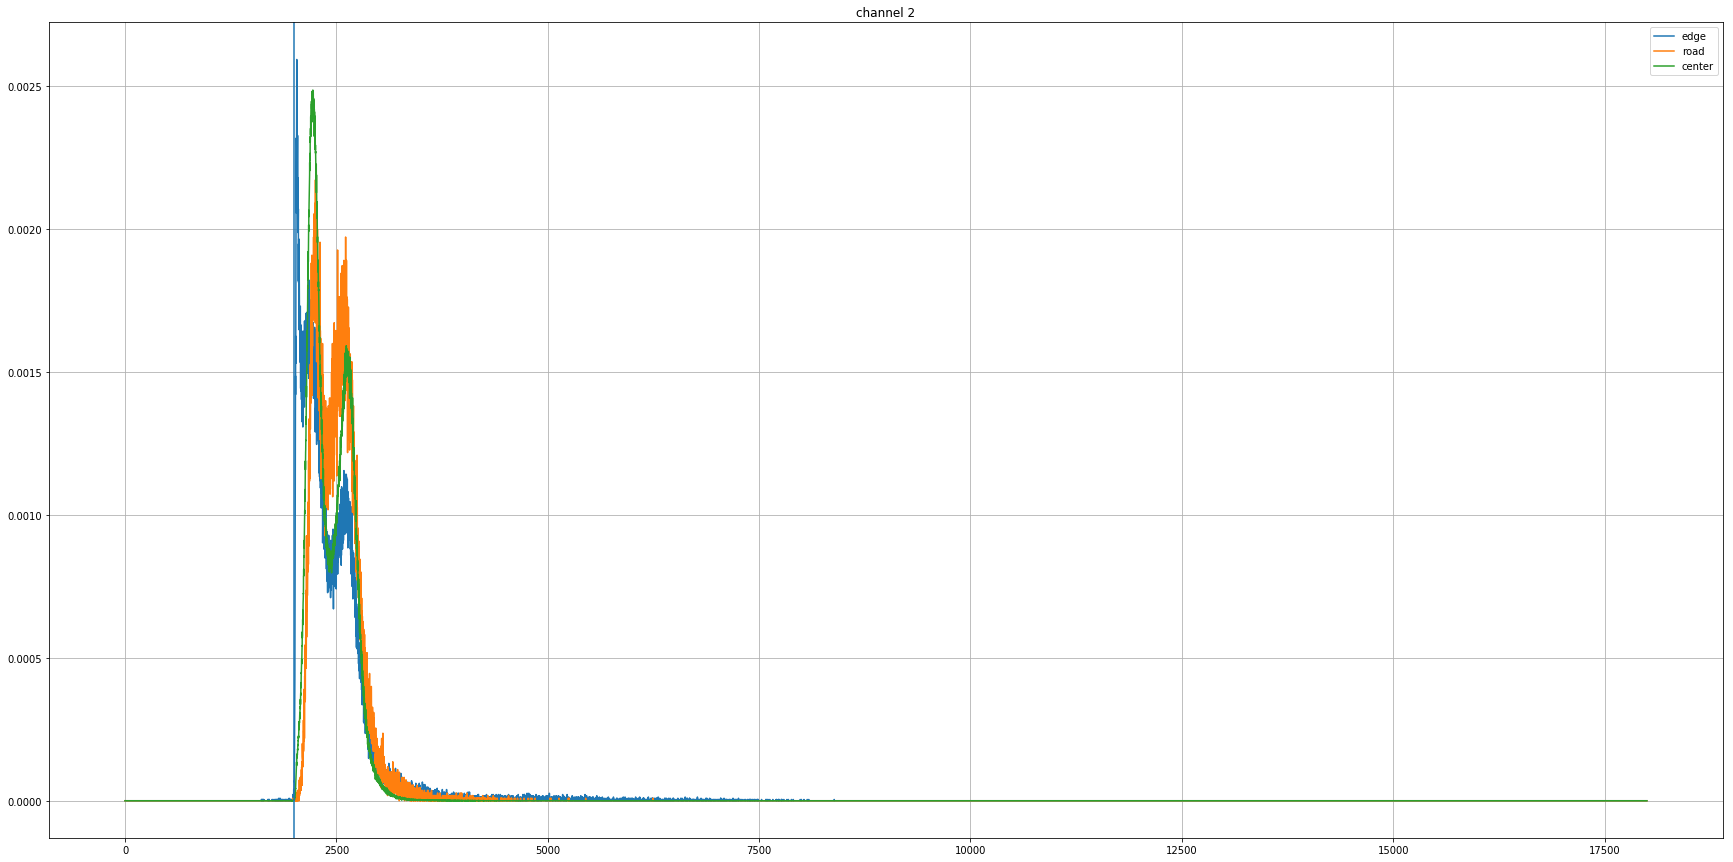

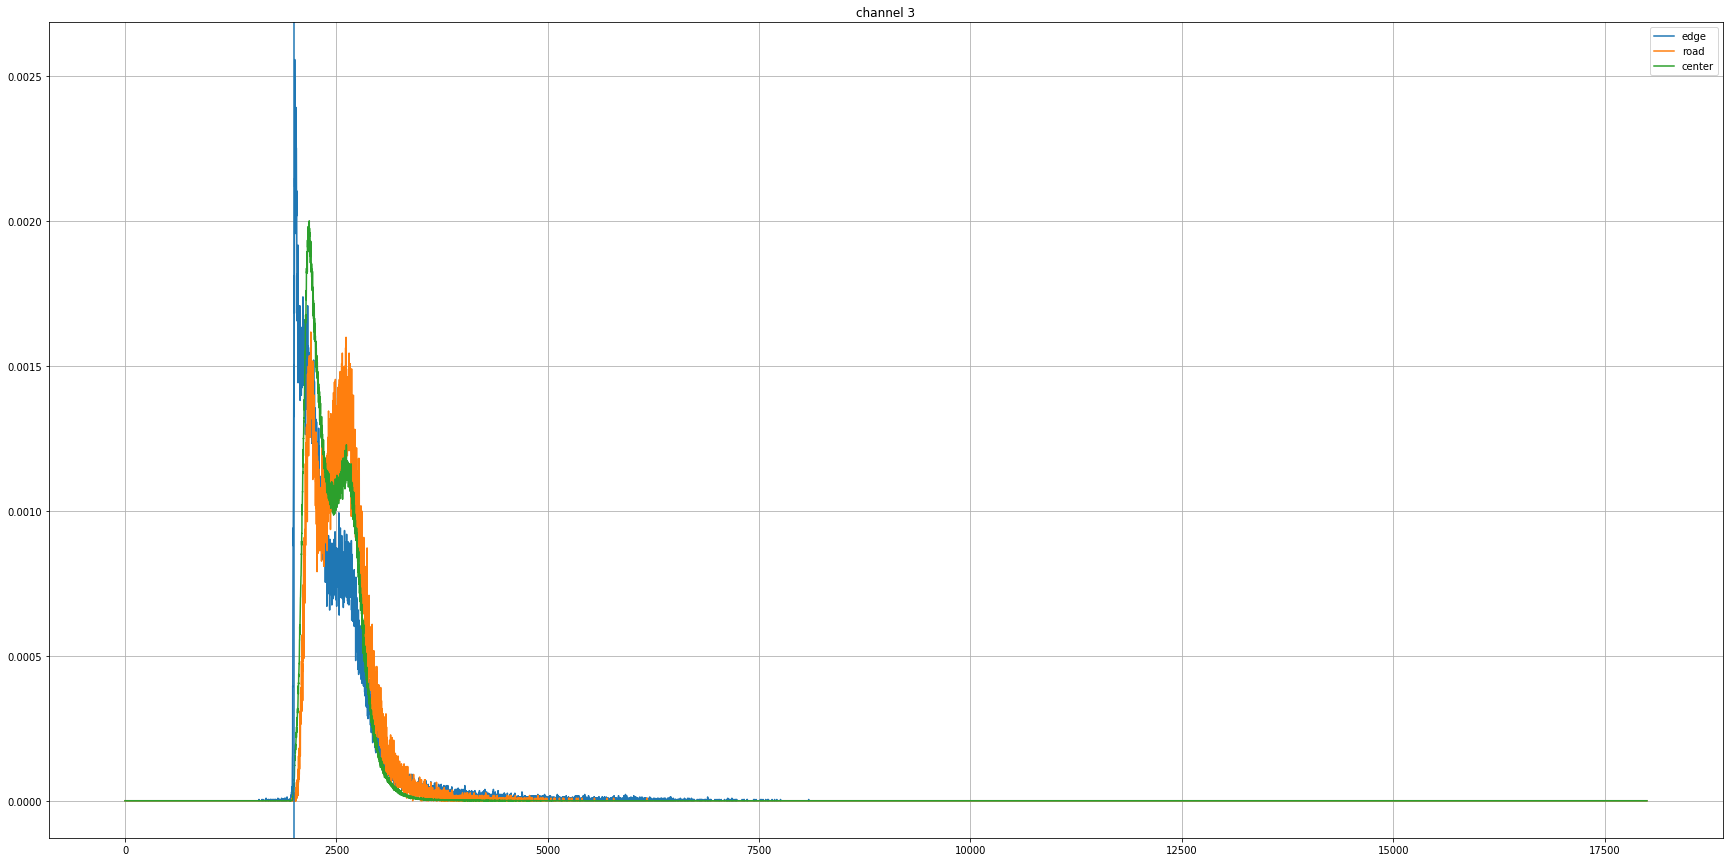

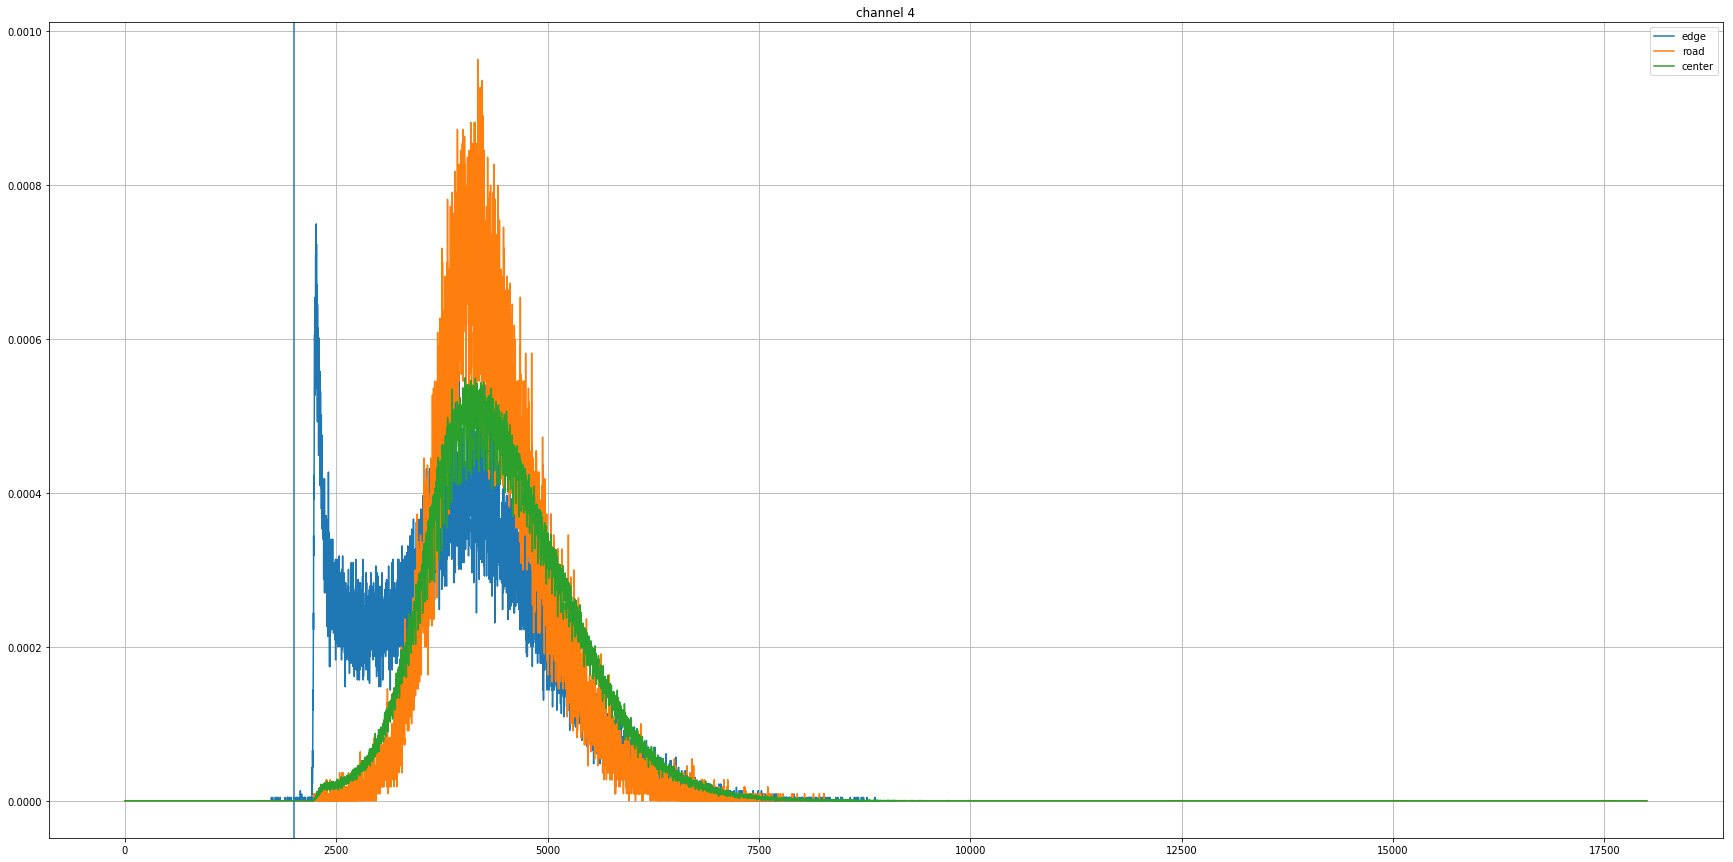

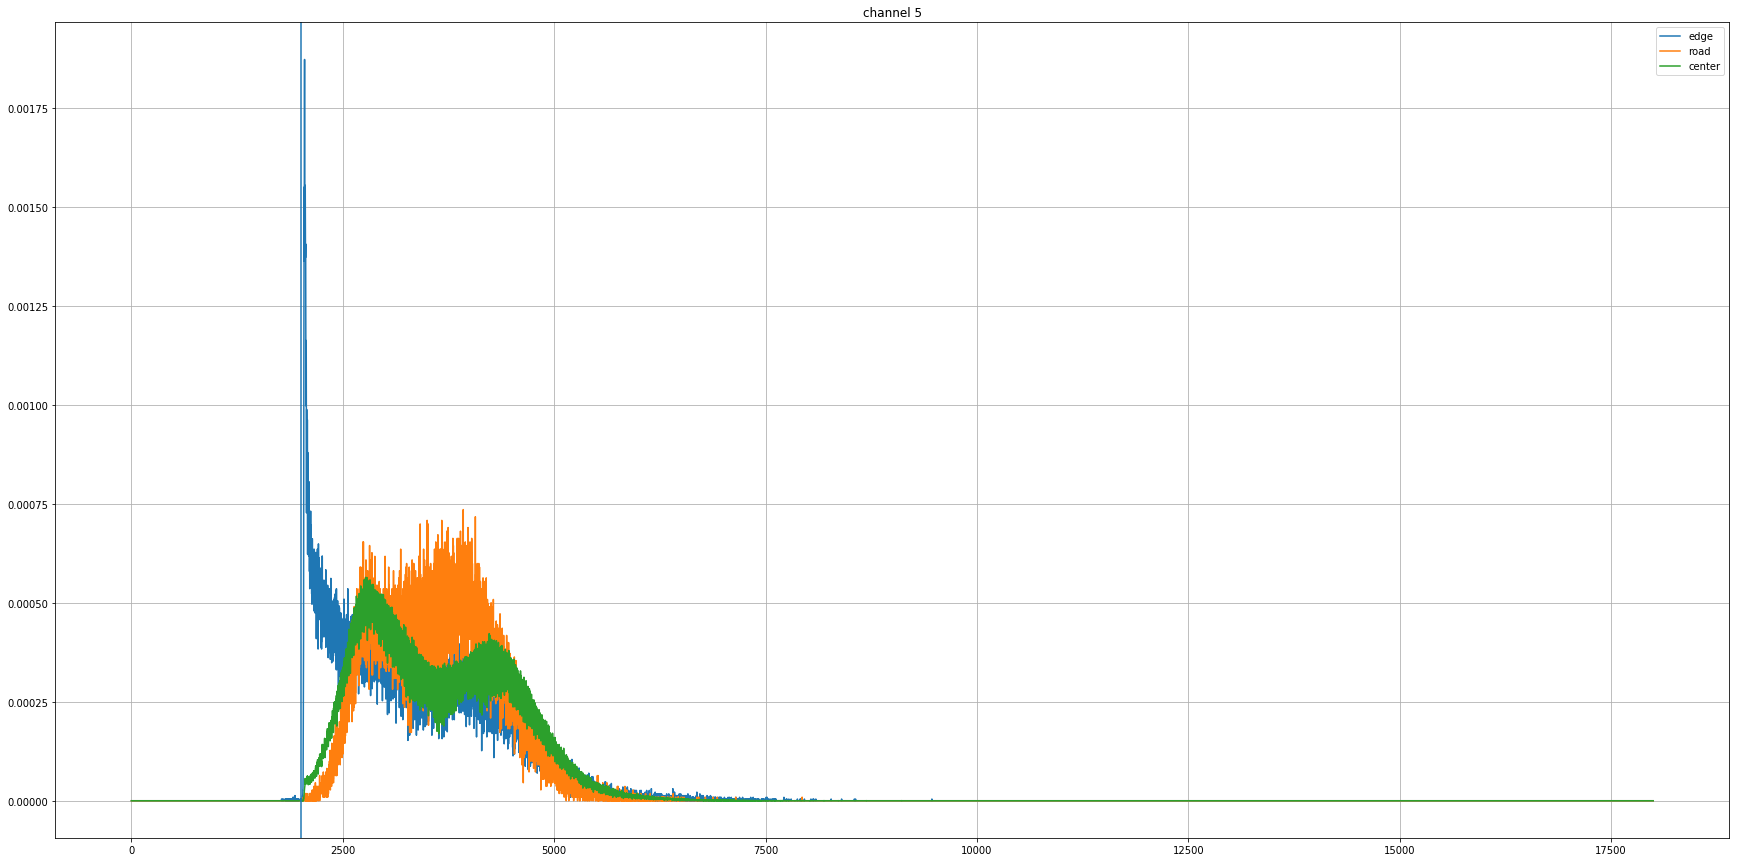

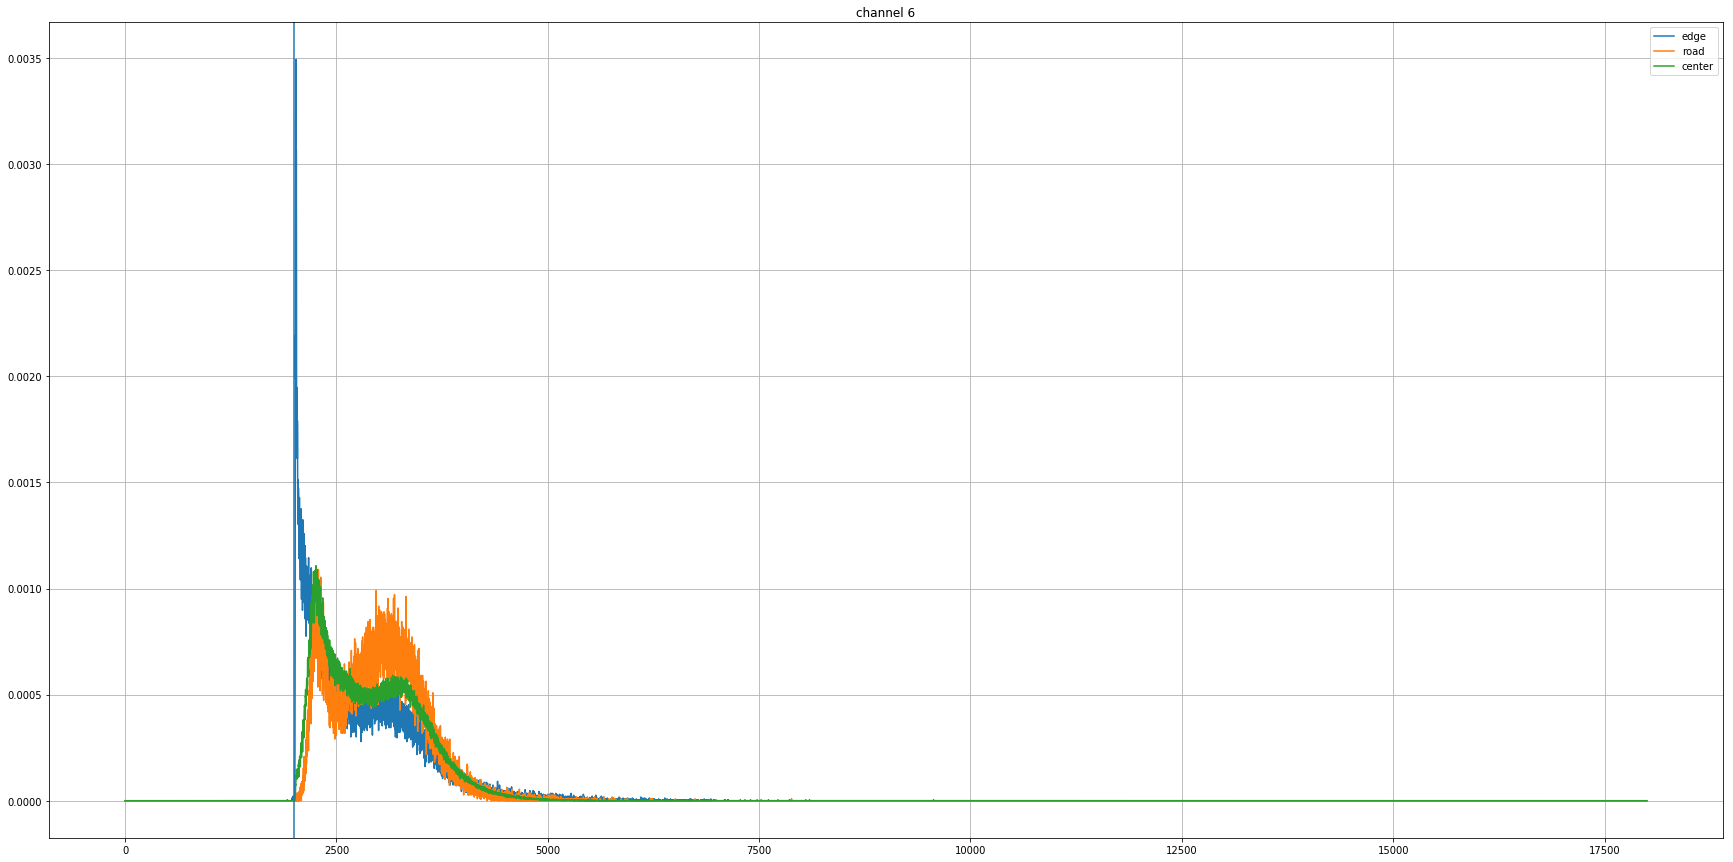

In [65]:
# Two subplots
for ch_n in range(7):
    plt.figure(figsize=(30,15))    
    plt.title('channel ' + str(ch_n))

    plt.plot(test_edge_distr_array[ch_n]/test_edge_distr_array[ch_n].sum(), label='edge')
    plt.plot(test_road_distr_array[ch_n]/test_road_distr_array[ch_n].sum(), label='road')
    plt.plot(test_center_distr_array[ch_n]/test_center_distr_array[ch_n].sum(), label='center')

    plt.axvline(x=-offset)
    plt.legend()
    plt.grid(True)
    plt.savefig('./Result/Channel Analysis/test_channel_' + str(ch_n) + '.png')
    plt.show()
    plt.close()

In [17]:
size = 8
norm = 'mean'
Train_Data = Data_Extractor (train_raw_image, train_road_mask, size,
                             pos_topleft_coord = train_pos_topleft_coord,
                             neg_topleft_coord = train_neg_topleft_coord,
                             normalization = norm)
# run garbage collector
gc.collect()

KeyboardInterrupt: 

In [ ]:
offset = -2000
max_idx = train_raw_image.max() - offset

train_center_distr_array = np.zeros((7, int(max_idx)))
train_edge_distr_array = np.zeros((7, int(max_idx)))
train_road_distr_array = np.zeros((7, int(max_idx)))

print('shape = ', train_edge_distr_array.shape)

for ch_n in range(7):
    for coord, patch, y in Train_Data.iterate_data_with_coord(norm=False):
        patch = patch[0][ch_n]
        cnt_edge = is_close_to_edge(coord, train_raw_image, size)
        cnt_road = is_close_to_road(coord, train_road_mask, size)
        
        if cnt_edge:
            count_pixel_value(patch, train_edge_distr_array[ch_n], offset)
        if cnt_road:
            count_pixel_value(patch, train_road_distr_array[ch_n], offset)
        if not (cnt_edge or cnt_road):
            count_pixel_value(patch, train_center_distr_array[ch_n], offset)

In [ ]:
# Two subplots
for ch_n in range(7):
    plt.figure(figsize=(30,15))    
    plt.plot(edge_distr_array[ch_n]/edge_distr_array[ch_n].sum(), label='edge')
    plt.plot(road_distr_array[ch_n]/road_distr_array[ch_n].sum(), label='road')
    plt.plot(center_distr_array[ch_n]/center_distr_array[ch_n].sum(), label='center')
    plt.axvline(x=-offset)
    plt.legend()
    plt.grid(True)
    plt.savefig('./Result/Channel Analysis/train_channel_' + str(ch_n) + '.png')
    plt.show()
    plt.close()

cv

In [ ]:
size = 8
norm = 'mean'
CV_Data = Data_Extractor (CV_raw_image, CV_road_mask, size,
                          pos_topleft_coord = CV_pos_topleft_coord,
                          neg_topleft_coord = CV_neg_topleft_coord,
                          normalization = norm)
gc.collect()

In [ ]:
# offset = -503
max_idx = CV_raw_image.max() - offset

cv_center_distr_array = np.zeros((7, int(max_idx)))
cv_edge_distr_array = np.zeros((7, int(max_idx)))
cv_road_distr_array = np.zeros((7, int(max_idx)))

print('shape = ', edge_distr_array.shape)

In [ ]:
for ch_n in range(7):
    for coord, patch, y in CV_Data.iterate_data_with_coord(norm=False):
        patch = patch[0][ch_n]
        cnt_edge = is_close_to_edge(coord, CV_raw_image, size)
        cnt_road = is_close_to_road(coord, CV_road_mask, size)
        
        if cnt_edge:
            count_pixel_value(patch, cv_edge_distr_array[ch_n], offset)
        if cnt_road:
            count_pixel_value(patch, cv_road_distr_array[ch_n], offset)
        if not (cnt_edge or cnt_road):
            count_pixel_value(patch, cv_center_distr_array[ch_n], offset)

In [ ]:
# Two subplots
for ch_n in range(7):
    plt.figure(figsize=(30,15))    
    plt.plot(cv_edge_distr_array[ch_n]/cv_edge_distr_array[ch_n].sum(), label='edge')
    plt.plot(cv_road_distr_array[ch_n]/cv_road_distr_array[ch_n].sum(), label='road')
    plt.plot(cv_center_distr_array[ch_n]/cv_center_distr_array[ch_n].sum(), label='center')
    plt.axvline(x=-offset)
    plt.legend()
    plt.grid(True)
    plt.savefig('./Result/Channel Analysis/cv_channel_' + str(ch_n) + '.png')
    plt.show()
    plt.close()

test

In [ ]:
size = 8
norm = 'mean'
Test_Data = Data_Extractor (test_raw_image, test_road_mask, size,
                            pos_topleft_coord = test_pos_topleft_coord,
                            neg_topleft_coord = test_neg_topleft_coord,
                            normalization = norm)
gc.collect()

In [ ]:
# offset = -503
max_idx = test_raw_image.max() - offset

test_center_distr_array = np.zeros((7, int(max_idx)))
test_edge_distr_array = np.zeros((7, int(max_idx)))
test_road_distr_array = np.zeros((7, int(max_idx)))

print('shape = ', edge_distr_array.shape, 'max_idx=', max_idx)

In [ ]:
for ch_n in range(7):
    for coord, patch, y in Test_Data.iterate_data_with_coord(norm=False):
        patch = patch[0][ch_n]
        cnt_edge = is_close_to_edge(coord, test_raw_image, size)
        cnt_road = is_close_to_road(coord, test_road_mask, size)
        
        if cnt_edge:
            count_pixel_value(patch, test_edge_distr_array[ch_n], offset)
        if cnt_road:
            count_pixel_value(patch, test_road_distr_array[ch_n], offset)
        if not (cnt_edge or cnt_road):
            count_pixel_value(patch, test_center_distr_array[ch_n], offset)

In [ ]:
# Two subplots
for ch_n in range(7):
    plt.figure(figsize=(30,15))    
    plt.plot(test_edge_distr_array[ch_n]/test_edge_distr_array[ch_n].sum(), label='edge')
    plt.plot(test_road_distr_array[ch_n]/test_road_distr_array[ch_n].sum(), label='road')
    plt.plot(test_center_distr_array[ch_n]/test_center_distr_array[ch_n].sum(), label='center')
    plt.axvline(x=-offset)
    plt.legend()
    plt.grid(True)
    plt.savefig('./Result/Channel Analysis/test_channel_' + str(ch_n) + '.png')
    plt.show()
    plt.close()

In [ ]:
# Two subplots
for ch_n in range(7):
    plt.figure(figsize=(30,15))    
    plt.plot(edge_distr_array[ch_n]/edge_distr_array[ch_n].sum(), label='edge')
    plt.plot(road_distr_array[ch_n]/road_distr_array[ch_n].sum(), label='road')
    plt.plot(center_distr_array[ch_n]/center_distr_array[ch_n].sum(), label='center')
    plt.axvline(x=-offset)
    plt.legend()
    plt.grid(True)
    plt.show()
    plt.close()